In [1]:
# import packages
import numpy as np
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon, shape
import fiona
fiona.drvsupport.supported_drivers['libkml'] = 'rw' # enable KML support which is disabled by default
fiona.drvsupport.supported_drivers['LIBKML'] = 'rw'
import plotly.express as px
from plotly.subplots import make_subplots
# # Will ensure that all rows are displayed
# pd.set_option('display.max_rows', None) 

# Will ensure that all columns are displayed
pd.set_option('display.max_columns', None) 

pd.set_option('display.float_format', lambda x: '%.5f' % x)

### Geocoded data
After the PPR data was run through the 'geocoding.py' to get the latitude and longitude of each house sold in Ireland, the data was read into this Jupyter Notebook.

In [2]:
# Reading in ol
df_part_1 = pd.read_csv('Data/Geolocation/geocoding_ppr_part_1.csv')
df_part_2 = pd.read_csv('Data/Geolocation/geocoding_ppr_part_2.csv')
df_part_3 = pd.read_csv('Data/Geolocation/geocoding_ppr_part_3.csv')
df_part_4 = pd.read_csv('Data/Geolocation/geocoding_ppr_part_4.csv')
df_part_5 = pd.read_csv('Data/Geolocation/geocoding_ppr_part_5.csv')
df_part_6 = pd.read_csv('Data/Geolocation/geocoding_ppr_part_6.csv')
df_part_7 = pd.read_csv('Data/Geolocation/geocoding_ppr_part_7.csv')
df_part_8 = pd.read_csv('Data/Geolocation/geocoding_ppr_part_8.csv')
df_part_9 = pd.read_csv('Data/Geolocation/geocoding_ppr_part_9.csv')
df_part_10 = pd.read_csv('Data/Geolocation/geocoding_ppr_part_10.csv')

# Merge together
df = pd.concat([df_part_1, 
                df_part_2, 
                df_part_3, 
                df_part_4, 
                df_part_5, 
                df_part_6, 
                df_part_7,
                df_part_8,
                df_part_9,
                df_part_10], ignore_index=True)

# Will ensure that all columns are displayed
pd.set_option('display.max_columns', None) 

# Will ensure that all columns are displayed
pd.set_option('display.max_rows', None)


In [3]:
# checking shape
print("The dataset has {} rows and {} columns.".format(*df.shape))

The dataset has 23316 rows and 11 columns.


In [4]:
df.head()

Unnamed: 0                                  formatted_address  latitude  \
0           0  1 Geoffrey Keating Rd, Saint Catherine's, Dubl...  53.33560   
1           1  10 Oldchurch Ct, Deansrath, Dublin 22, D22 VR0...  53.32021   
2           2  11 Park House, Baldoyle, Dublin 13, D13 RPX9, ...  53.39601   
3           3  14 Gleann Bhearú, Rathstewart, Athy, Co. Kilda...  53.00059   
4           4  14 Terenure Park, Terenure, Dublin 6W, Co. Dub...  53.31118   

   longitude            accuracy  \
0   -6.27962             ROOFTOP   
1   -6.41931             ROOFTOP   
2   -6.12899             ROOFTOP   
3   -6.98588  RANGE_INTERPOLATED   
4   -6.28561             ROOFTOP   

                                     google_place_id  \
0                        ChIJFyUSziIMZ0gRyF13oJEKSDk   
1                        ChIJsSi7jXFzZ0gR_lgnkYXNKWc   
2                        ChIJI_fNhjAFZ0gR5KBeyeHq_vM   
3  EjoxNCBHbGVhbm4gQmhlYXLDuiwgUmF0aHN0ZXdhcnQsIE...   
4                        ChIJHxPFlPULZ0gR8kvNamVkWmk   

                              type  postcode  \
0                          premise  D08 V4X7   
1                   street_address  D22 VR04   
2                   street_address  D13 RPX9   
3                   street_address       NaN   
4  establishment,point_of_interest  D6W X744   

                                        input_string  number_of_results status  
0  1 GEOFFREY KEATING ROAD, DUBLIN 8, DUBLIN, DUB...                  1     OK  
1  10 OLD CHURCH COURT, CLONDALKIN, DUBLIN 22, DU...                  1     OK  
2  11 PARK HOUSE, WILLANS AVENUE, ONGAR, DUBLIN, ...                  2     OK  
3  14 GLEANN BHEARU, COIS BHEARU, ATHY, KILDARE, ...                  1     OK  
4  14 WHITTON ROAD, TERENURE, DUBLIN 6, DUBLIN, I...                  1     OK

In [5]:
df.columns

Index(['Unnamed: 0', 'formatted_address', 'latitude', 'longitude', 'accuracy',
       'google_place_id', 'type', 'postcode', 'input_string',
       'number_of_results', 'status'],
      dtype='object')

In [6]:
# checking for missing data
print('Nan in each columns' , df.isna().sum(), sep='\n')

Nan in each columns
Unnamed: 0               0
formatted_address       20
latitude                20
longitude               20
accuracy                20
google_place_id         20
type                    20
postcode             10303
input_string             0
number_of_results        0
status                   0
dtype: int64


In [7]:
# changing the values to upper case to match the style of other dataframes.
df['formatted_address'] =  df['formatted_address'].str.upper()

In [8]:
df.to_csv('Data/Geolocation/geocoding_ppr.csv', index=False)

### Merging Geocoding Data with clean PPR

In [9]:
# reading in clean PPR data
ppr = pd.read_csv('Data/clean_gda_ppr.csv', parse_dates = ['date'])

# checking shape
print("The dataset has {} rows and {} columns.".format(*ppr.shape))

The dataset has 23316 rows and 15 columns.


In [10]:
ppr.head()

date                                     address   county  \
0 2021-07-01   1 GEOFFREY KEATING ROAD, DUBLIN 8, DUBLIN   DUBLIN   
1 2021-07-01  10 OLD CHURCH COURT, CLONDALKIN, DUBLIN 22   DUBLIN   
2 2021-07-01        11 PARK HOUSE, WILLANS AVENUE, ONGAR   DUBLIN   
3 2021-07-01         14 GLEANN BHEARU, COIS BHEARU, ATHY  KILDARE   
4 2021-07-01         14 WHITTON ROAD, TERENURE, DUBLIN 6   DUBLIN   

               eircode        price not_full_market_price vat_exclusive  \
0  EIRCODE UNAVAILABLE 380000.00000                    No            No   
1  EIRCODE UNAVAILABLE 265000.00000                    No            No   
2  EIRCODE UNAVAILABLE 155000.00000                    No            No   
3  EIRCODE UNAVAILABLE 125000.00000                    No            No   
4  EIRCODE UNAVAILABLE 680000.00000                    No            No   

                             description size_description month_year  \
0  Second-Hand Dwelling house /Apartment     Unknown Size    2021-07   
1  Second-Hand Dwelling house /Apartment     Unknown Size    2021-07   
2  Second-Hand Dwelling house /Apartment     Unknown Size    2021-07   
3  Second-Hand Dwelling house /Apartment     Unknown Size    2021-07   
4  Second-Hand Dwelling house /Apartment     Unknown Size    2021-07   

  eircode_availability        town postcode                  gda  \
0  EIRCODE UNAVAILABLE      DUBLIN      NaN  GREATER DUBLIN AREA   
1  EIRCODE UNAVAILABLE   DUBLIN 22      NaN  GREATER DUBLIN AREA   
2  EIRCODE UNAVAILABLE       ONGAR      NaN  GREATER DUBLIN AREA   
3  EIRCODE UNAVAILABLE        ATHY      NaN  GREATER DUBLIN AREA   
4  EIRCODE UNAVAILABLE    DUBLIN 6      NaN  GREATER DUBLIN AREA   

                                       total_address  
0  1 GEOFFREY KEATING ROAD, DUBLIN 8, DUBLIN, DUB...  
1  10 OLD CHURCH COURT, CLONDALKIN, DUBLIN 22, DU...  
2  11 PARK HOUSE, WILLANS AVENUE, ONGAR, DUBLIN, ...  
3  14 GLEANN BHEARU, COIS BHEARU, ATHY, KILDARE, ...  
4  14 WHITTON ROAD, TERENURE, DUBLIN 6, DUBLIN, I...

In [11]:
ppr.head().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   5 non-null      datetime64[ns]
 1   address                5 non-null      object        
 2   county                 5 non-null      object        
 3   eircode                5 non-null      object        
 4   price                  5 non-null      float64       
 5   not_full_market_price  5 non-null      object        
 6   vat_exclusive          5 non-null      object        
 7   description            5 non-null      object        
 8   size_description       5 non-null      object        
 9   month_year             5 non-null      object        
 10  eircode_availability   5 non-null      object        
 11  town                   5 non-null      object        
 12  postcode               0 non-null      object        
 13  gda      

In [12]:
# merging clean PPR and Google Maps Geocoding data
ppr_df = ppr.merge(df, left_on='total_address', right_on='input_string', how='left')

# checking shape
print("The dataset has {} rows and {} columns.".format(*ppr_df.shape))

The dataset has 23316 rows and 26 columns.


In [13]:
# checking for missing data
print('Nan in each columns' ,ppr_df.isna().sum(), sep='\n')
# no missing data

Nan in each columns
date                         0
address                      0
county                       0
eircode                      0
price                        0
not_full_market_price        0
vat_exclusive                0
description                  0
size_description             0
month_year                   0
eircode_availability         0
town                         0
postcode_x               23312
gda                          0
total_address                0
Unnamed: 0                   1
formatted_address           21
latitude                    21
longitude                   21
accuracy                    21
google_place_id             21
type                        21
postcode_y               10304
input_string                 1
number_of_results            1
status                       1
dtype: int64


In [14]:
# droppng irrelevant columns
ppr_df = ppr_df[['date',     
                 'month_year', 
                 'total_address',  'formatted_address', 'input_string', 
#                     'county', 
                    'eircode', 
#                     'postcode_y', 
                    'price',
                    'not_full_market_price', 
                    'vat_exclusive', 
                    'description',
                    'size_description', 
#                     'gda', 
#                     'postcode_x', 
#                     'town', 
                    'eircode_availability', 
#                     'Unnamed: 0', 
                    'latitude', 
                    'longitude', 
#                     'accuracy',
#                     'google_place_id', 
#                     'type',
#                     'number_of_results', 
#                     'status'
                        ]]
ppr_df.head(1).transpose()

0
date                                                 2021-07-01 00:00:00
month_year                                                       2021-07
total_address          1 GEOFFREY KEATING ROAD, DUBLIN 8, DUBLIN, DUB...
formatted_address      1 GEOFFREY KEATING RD, SAINT CATHERINE'S, DUBL...
input_string           1 GEOFFREY KEATING ROAD, DUBLIN 8, DUBLIN, DUB...
eircode                                              EIRCODE UNAVAILABLE
price                                                       380000.00000
not_full_market_price                                                 No
vat_exclusive                                                         No
description                        Second-Hand Dwelling house /Apartment
size_description                                            Unknown Size
eircode_availability                                 EIRCODE UNAVAILABLE
latitude                                                        53.33560
longitude                                                       -6.27962

In [15]:
# checking shape
print("The dataset has {} rows and {} columns.".format(*ppr_df.shape))

The dataset has 23316 rows and 14 columns.


In [16]:
ppr_df = ppr_df.sort_values(by= 'date', ascending = False)
ppr_df.tail()

date month_year                                      total_address  \
29 2021-07-01    2021-07  7 THE GROVE, SALLINS PARK, SALLINS, KILDARE, I...   
28 2021-07-01    2021-07  7 STREET MARYS GARDENS, MARY STREET NORTH, DUN...   
27 2021-07-01    2021-07  69 ALEXANDRA PLACE, 55 58 EAST ROAD, DUBLIN 3,...   
26 2021-07-01    2021-07  65 OLDBRIDGE PARK, OLDTOWN DOMAIN, OBERSTOWN, ...   
0  2021-07-01    2021-07  1 GEOFFREY KEATING ROAD, DUBLIN 8, DUBLIN, DUB...   

                                    formatted_address  \
29  7 THE GROVE, SALLINS, SALLINS PARK, CO. KILDAR...   
28  MARY ST N, TOWNPARKS, DUNDALK, CO. LOUTH, IRELAND   
27            55 EAST RD, NORTH DOCK, DUBLIN, IRELAND   
26  65 OLDBRIDGE PARK, MONREAD NORTH, CO. KILDARE,...   
0   1 GEOFFREY KEATING RD, SAINT CATHERINE'S, DUBL...   

                                         input_string              eircode  \
29  7 THE GROVE, SALLINS PARK, SALLINS, KILDARE, I...  EIRCODE UNAVAILABLE   
28  7 STREET MARYS GARDENS, MARY STREET NORTH, DUN...  EIRCODE UNAVAILABLE   
27  69 ALEXANDRA PLACE, 55 58 EAST ROAD, DUBLIN 3,...  EIRCODE UNAVAILABLE   
26  65 OLDBRIDGE PARK, OLDTOWN DOMAIN, OBERSTOWN, ...  EIRCODE UNAVAILABLE   
0   1 GEOFFREY KEATING ROAD, DUBLIN 8, DUBLIN, DUB...  EIRCODE UNAVAILABLE   

          price not_full_market_price vat_exclusive  \
29 227000.00000                    No            No   
28 215000.00000                    No            No   
27 350000.00000                    No            No   
26 317137.00000                    No           Yes   
0  380000.00000                    No            No   

                              description size_description  \
29  Second-Hand Dwelling house /Apartment     Unknown Size   
28  Second-Hand Dwelling house /Apartment     Unknown Size   
27  Second-Hand Dwelling house /Apartment     Unknown Size   
26          New Dwelling house /Apartment     Unknown Size   
0   Second-Hand Dwelling house /Apartment     Unknown Size   

   eircode_availability  latitude  longitude  
29  EIRCODE UNAVAILABLE  53.25481   -6.66671  
28  EIRCODE UNAVAILABLE  54.00734   -6.39648  
27  EIRCODE UNAVAILABLE  53.35319   -6.23142  
26  EIRCODE UNAVAILABLE  53.24389   -6.67275  
0   EIRCODE UNAVAILABLE  53.33560   -6.27962

##### Dealing with NaNs
The column 'formatted_address' is the address that Google Maps thought was the most similar to the column 'input strings'. 

There are 23 NaNs in column 'formatted_address', which means that for these 23 addresses, Google Maps could not find an appropriate match.

In [17]:
# examining all column 'formatted_address' that are empty 
df[['input_string','formatted_address']][df['input_string'].isnull()]

# dropping all rows that have NaNs in column 'formatted_address'
df = df[~(df['formatted_address'].isnull())]

# examining all columns again
print('Nan in each columns' , df.isna().sum(), sep='\n')

# checking shape
print("The dataset has {} rows and {} columns.".format(*df.shape))

Nan in each columns
Unnamed: 0               0
formatted_address        0
latitude                 0
longitude                0
accuracy                 0
google_place_id          0
type                     0
postcode             10283
input_string             0
number_of_results        0
status                   0
dtype: int64
The dataset has 23296 rows and 11 columns.


#### How many zero results do we ave?

In [18]:
ZERO_RESULTS_df = df[df['status'] == 'ZERO_RESULTS']

len(ZERO_RESULTS_df)

0

In [19]:
df[['input_string','formatted_address']][df['input_string'].isnull()]

Empty DataFrame
Columns: [input_string, formatted_address]
Index: []

#### Wrong country?
There are several rows where Google Maps incorrectly identified the address as being outside of Ireland. 

###### How many rows with incorrectly classified countries are there?

In [20]:
# Examining  all addresses that were miscoordnated
df['formatted_address'][~(df['formatted_address'].str.contains('IRELAND'))]

922                           OAK PARK VIC 3046, AUSTRALIA
2723                          OAK PARK VIC 3046, AUSTRALIA
4295                                             DUBLIN RD
4869         WADDINGTON ST, FLASS VALE, DURHAM DH1 4BG, UK
5317                                             DUBLIN RD
7374     3 CONNAUGHT CL, ST GEORGE'S FIELDS, LONDON W2 ...
7490          12 OAK PARK CT, OAK PARK VIC 3046, AUSTRALIA
7803          10 OAK PARK CT, OAK PARK VIC 3046, AUSTRALIA
14876                                            DUBLIN RD
16445                                 SKÅNE COUNTY, SWEDEN
17957                       BLACKHEATH NSW 2785, AUSTRALIA
19318                                            DUBLIN RD
19690                                            DUBLIN RD
21977                                            DUBLIN RD
Name: formatted_address, dtype: object

In [21]:
len(df['formatted_address'][~(df['formatted_address'].str.contains('IRELAND'))])

14

In [22]:
# dropping all addresses that were miscoordnated
df = df[(df['formatted_address'].str.contains('IRELAND'))]


##### Wrong County? 
There are several rows where Google Maps incorrectly identified the address as being outside of GDA + Louth.

###### How many rows with incorrectly classified counties are there?

In [23]:
irish_language_df = df['formatted_address'][ ~(df['formatted_address'].str.contains('MEATH|KILDARE|WICKLOW|DUBLIN|LOUTH'))]
irish_language_df.head(10)


77      32 BÓTHAR TEMPLE, AN CHARRAIG DHUBH, BAILE ÁTH...
302         UNNAMED ROAD, CO., GLADREE, CO. MAYO, IRELAND
444     38 INNIS LINN, DROIM INEASCLAINN, CO. CONTAE L...
1191    119 BLACKCASTLE DEMESNE, BLACKCASTLE, CO. CONT...
1192    BELGARD SQUARE NORTH, TAMHLACHT, BAILE ÁTHA CL...
2449    9 GLENCAIRN HEATH, MURPHYSTOWN, BAILE ÁTHA CLI...
2884    15 COLLEGEFORT, CASTLEKNOCK, BAILE ÁTHA CLIATH...
2961    66 COLLEGEFORT, CASTLEKNOCK, BAILE ÁTHA CLIATH...
3003                                  BEAMORE RD, IRELAND
3480    80 COLLEGEFORT, CASTLEKNOCK, BAILE ÁTHA CLIATH...
Name: formatted_address, dtype: object

In [24]:
for i in irish_language_df:
    print(i)

32 BÓTHAR TEMPLE, AN CHARRAIG DHUBH, BAILE ÁTHA CLIATH, IRELAND
UNNAMED ROAD, CO., GLADREE, CO. MAYO, IRELAND
38 INNIS LINN, DROIM INEASCLAINN, CO. CONTAE LÚ, A91 CP57, IRELAND
119 BLACKCASTLE DEMESNE, BLACKCASTLE, CO. CONTAE NA MÍ, IRELAND
BELGARD SQUARE NORTH, TAMHLACHT, BAILE ÁTHA CLIATH, IRELAND
9 GLENCAIRN HEATH, MURPHYSTOWN, BAILE ÁTHA CLIATH, D18 Y4C1, IRELAND
15 COLLEGEFORT, CASTLEKNOCK, BAILE ÁTHA CLIATH, IRELAND
66 COLLEGEFORT, CASTLEKNOCK, BAILE ÁTHA CLIATH, IRELAND
BEAMORE RD, IRELAND
80 COLLEGEFORT, CASTLEKNOCK, BAILE ÁTHA CLIATH, IRELAND
TIKNOCK, CO. CARLOW, IRELAND
11 CNOC DUBH, GRANGE, BAILE BACHAILLE, CO. CONTAE BHAILE ÁTHA CLIATH, A41 Y026, IRELAND
42 COLLEGEFORT, CASTLEKNOCK, BAILE ÁTHA CLIATH, D15 H732, IRELAND
25 BÓTHAR BHAILE SCALLART, BEALACH ORLAÍ, SCHOLLARSTOWN, BAILE ÁTHA CLIATH 16, CO. CONTAE BHAILE ÁTHA CLIATH, D16 Y7A4, IRELAND
4 SEA CLIFF, NYMPHHALL, DUNMORE EAST, CO. WATERFORD, X91 F5F6, IRELAND
16 COILL NA GLAISE, AN CLÓS CÚIRTE, KILLARNEY, BRÉ, CO. CONT

In [25]:
df[ 'formatted_address'] = df[ 'formatted_address'].str.replace('CO. CONTAE BHAILE ÁTHA CLIATH', 'DUBLIN')
df[ 'formatted_address'] = df[ 'formatted_address'].str.replace('BAILE ÁTHA CLIATH', 'DUBLIN')
df[ 'formatted_address'] = df[ 'formatted_address'].str.replace('CO. CONTAE NA MÍ', 'MEATH')
df[ 'formatted_address'] = df[ 'formatted_address'].str.replace('CO. CONTAE LÚ', 'LOUTH')
df[ 'formatted_address'] = df[ 'formatted_address'].str.replace('CO. CONTAE CHILL MHANTÁIN', 'WICKLOW')


C:\Users\Karina\AppData\Local\Temp\ipykernel_11020\990711425.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df[ 'formatted_address'] = df[ 'formatted_address'].str.replace('CO. CONTAE BHAILE ÁTHA CLIATH', 'DUBLIN')
C:\Users\Karina\AppData\Local\Temp\ipykernel_11020\990711425.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df[ 'formatted_address'] = df[ 'formatted_address'].str.replace('CO. CONTAE NA MÍ', 'MEATH')
C:\Users\Karina\AppData\Local\Temp\ipykernel_11020\990711425.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df[ 'formatted_address'] = df[ 'formatted_address'].str.replace('CO. CONTAE LÚ', 'LOUTH')
C:\Users\Karina\AppData\Local\Temp\ipykernel_11020\990711425.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df[ 'formatted_address'] = df[ 'formatted_address'].str.re

In [26]:
wrong_county_df = df[['input_string', 'formatted_address']][ ~(df['formatted_address'].str.contains('DUNDRUM|MEATH|KILDARE|WICKLOW|DUBLIN|LOUTH'))]
wrong_county_df.head(20)

input_string  \
302       DUN NA MBO, UN UAIMH, CO MEATH, MEATH, IRELAND   
3003   LAGAVOREN, BEAMORE ROAD, DROGHEDA, MEATH, IRELAND   
3926        TYNOCKI, KILTEGAN, WICKLOW, WICKLOW, IRELAND   
5906   4 SEACLIFF, DUNMORE EAST, CO WATERFORD, MEATH,...   
6784   5 COOLAGH WELL, BEAMORE ROAD, DROGHEDA, LOUTH,...   
7837   14F THE SWAN, ATHY, CO KILDARE, KILDARE, R14C6...   
9067   13 CHAPEL HILL GLEBE ROAD, ENNISKERRY ROAD, KI...   
9083   16 KILKEE HOUSE, CLARE VILLAGE, MALAHIDE ROAD,...   
9566   CAVAN ROAD, RESPA LANE, OLDCASTLE, MEATH, A82T...   
10737  BARROW VIEW LODGE, NEWTOWNPILLSWORTH, MAGANEY,...   
11691  75 THE CAMPION, MARINA VILLAGE AMENTS, GREYSTO...   
12808     TYNOCK, KILTEGAN, CO WICKLOW, WICKLOW, IRELAND   
12855  23-30 LAWLORS HILL, ARDFERT, KERRY, KILDARE, I...   
13116         THE MANOR, LISLIN, MULLAGH, MEATH, IRELAND   
15950    DRAKELAND LOWER, SHILLELOGHER, KILDARE, IRELAND   
16563  TYNNOCK COTTAGE, KILTEGAN, WICKLOW, WICKLOW, W...   
17892  APT 8 ROCKSHIRE HOUSE, ROCKSHIRE ROAD, FERRYBA...   
18201  33 OAK HILL, GOREY, COUNTY WEXFORD, WICKLOW, Y...   
20565  45 KILKEE HOUSE, CLARE VILLAGE, MALAHIDE ROAD ...   
22802  CLONSAST, RATHANGAN, KILDARE, KILDARE, R51NW68...   

                                       formatted_address  
302        UNNAMED ROAD, CO., GLADREE, CO. MAYO, IRELAND  
3003                                 BEAMORE RD, IRELAND  
3926                        TIKNOCK, CO. CARLOW, IRELAND  
5906   4 SEA CLIFF, NYMPHHALL, DUNMORE EAST, CO. WATE...  
6784                                 BEAMORE RD, IRELAND  
7837     RATHSTEWART, SWAN, CO. LAOIS, R14 TE18, IRELAND  
9067                              ENNISKERRY RD, IRELAND  
9083                   DOUGH, KILKEE, CO. CLARE, IRELAND  
9566                        CAVAN RD, CO. CAVAN, IRELAND  
10737   BARROW VIEW, GRANGE, MAGANEY, CO. LAOIS, IRELAND  
11691                                  A63 CK28, IRELAND  
12808                       TIKNOCK, CO. CARLOW, IRELAND  
12855         FARRANWILLIAM, ARDFERT, CO. KERRY, IRELAND  
13116                      LISLIN RD, CO. CAVAN, IRELAND  
15950         SHILLELOGHER, BOOLY, CO. KILKENNY, IRELAND  
16563             TIKNOCK, CO. CARLOW, W91 RT9V, IRELAND  
17892  ROCKSHIRE HOUSE, ROCKSHIRE RD, FERRYBANK, WATE...  
18201  33 OAKHILL, RAMSTOWN LOWER, GOREY, CO. WEXFORD...  
20565                  DOUGH, KILKEE, CO. CLARE, IRELAND  
22802      CLONSAST UPPER, CO. OFFALY, R51 NW68, IRELAND

In [27]:
for i in wrong_county_df['input_string']:
    print(i)

DUN NA MBO, UN UAIMH, CO MEATH, MEATH, IRELAND
LAGAVOREN, BEAMORE ROAD, DROGHEDA, MEATH, IRELAND
TYNOCKI, KILTEGAN, WICKLOW, WICKLOW, IRELAND
4 SEACLIFF, DUNMORE EAST, CO WATERFORD, MEATH, X91F5F6, IRELAND
5 COOLAGH WELL, BEAMORE ROAD, DROGHEDA, LOUTH, A92RK09, IRELAND
14F THE SWAN, ATHY, CO KILDARE, KILDARE, R14C623, IRELAND
13 CHAPEL HILL GLEBE ROAD, ENNISKERRY ROAD, KILTERNAN, DUBLIN, IRELAND
16 KILKEE HOUSE, CLARE VILLAGE, MALAHIDE ROAD, DUBLIN, D17HV58, IRELAND
CAVAN ROAD, RESPA LANE, OLDCASTLE, MEATH, A82TP68, IRELAND
BARROW VIEW LODGE, NEWTOWNPILLSWORTH, MAGANEY, KILDARE, R93A7N8, IRELAND
75 THE CAMPION, MARINA VILLAGE AMENTS, GREYSTONES, WICKLOW, A63CK28, IRELAND
TYNOCK, KILTEGAN, CO WICKLOW, WICKLOW, IRELAND
23-30 LAWLORS HILL, ARDFERT, KERRY, KILDARE, IRELAND
THE MANOR, LISLIN, MULLAGH, MEATH, IRELAND
DRAKELAND LOWER, SHILLELOGHER, KILDARE, IRELAND
TYNNOCK COTTAGE, KILTEGAN, WICKLOW, WICKLOW, W91RT9V, IRELAND
APT 8 ROCKSHIRE HOUSE, ROCKSHIRE ROAD, FERRYBANK, KILDARE, IRELAND


In [28]:
len(wrong_county_df)

22

In [29]:
# dropping all addresses that were miscoordnated
df = df[df['formatted_address'].str.contains('DUNDRUM|MEATH|KILDARE|WICKLOW|DUBLIN|LOUTH')]

In [30]:
# checking shape
print("The dataset has {} rows and {} columns.".format(*df.shape))

The dataset has 23260 rows and 11 columns.


## Geodataframe

In [31]:
# Converting dataframe to geodataframe
ppr_gdf = gpd.GeoDataFrame(ppr_df,
                       crs = {'init' :'epsg:3857'},
                       geometry=gpd.points_from_xy(ppr_df.longitude, ppr_df.latitude))
ppr_gdf.head(1).transpose()


C:\Users\Karina\miniconda3\lib\site-packages\pyproj\crs\crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


23283
date                                                 2022-06-30 00:00:00
month_year                                                       2022-06
total_address          25 FINGAL STREET, OFF CORK STREET, DUBLIN 8, D...
formatted_address      25 FINGAL ST, SAINT CATHERINE'S, DUBLIN, D08 Y...
input_string           25 FINGAL STREET, OFF CORK STREET, DUBLIN 8, D...
eircode                                                          D08Y2Y6
price                                                        40000.00000
not_full_market_price                                                 No
vat_exclusive                                                         No
description                        Second-Hand Dwelling house /Apartment
size_description                                            Unknown Size
eircode_availability                                   EIRCODE AVAILABLE
latitude                                                        53.33537
longitude                                                       -6.28824
geometry                                   POINT (-6.2882437 53.3353729)

In [32]:
ppr_gdf = ppr_gdf[~(ppr_gdf['longitude'].isnull())]
ppr_gdf.shape

(23295, 15)

### Eircodes

An attempt was made to download the eircodes from https://autoaddress.com/en-ie/support/developer-centre/resources/routing-key-boundaries, however, there was an issue with the data when it was downloade. The shapefles had no corespondence to which eircode does each polyglot belonged to. 

So the KML file was donwloaded from https://www.google.com/maps/d/u/0/viewer?mid=1ObFwqV2vtigkclpjea3sUHNhUuw&ll=53.44757200066367%2C-8.238166499999998&z=7 and was read into this jupyter notebook.

A warning is also issued with the Eircode data.

In [33]:
eircode_gdf = gpd.read_file('Data/Shapefiles/clean_eircode_gdf.geojson')

eircode_gdf.head(1).transpose()


0
eircode_name                                                       A45
eircode_description                                            OLDTOWN
area_in_km2_eircode                                           28.79241
geometry             POLYGON Z ((-6.3663051 53.526173 0, -6.366247 ...

In [34]:

# fig,ax = plt.subplots(figsize = (15,15))
# eircode_gdf.plot(ax = ax, cmap = 'jet', edgecolor = 'black')

In [35]:
eircode_gdf.columns

Index(['eircode_name', 'eircode_description', 'area_in_km2_eircode',
       'geometry'],
      dtype='object')

#### Merge the Eircode  with PPR Data

In [36]:
# fig,ax = plt.subplots(figsize = (15,15))
# eircode_gdf.plot(aspect = 1, ax = ax, cmap = 'jet', edgecolor = 'black')
# ppr_gdf.plot(ax = ax)

In [37]:
ppr_gdf = gpd.sjoin(ppr_gdf, eircode_gdf, how="inner", op='within')

# dropping irrelenvant colunns
ppr_gdf = ppr_gdf.drop(['index_right'], axis=1)

ppr_gdf.head(1).transpose()

C:\Users\Karina\miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3337: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
C:\Users\Karina\AppData\Local\Temp\ipykernel_11020\2807153898.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:3857
Right CRS: EPSG:4326

  ppr_gdf = gpd.sjoin(ppr_gdf, eircode_gdf, how="inner", op='within')


23283
date                                                 2022-06-30 00:00:00
month_year                                                       2022-06
total_address          25 FINGAL STREET, OFF CORK STREET, DUBLIN 8, D...
formatted_address      25 FINGAL ST, SAINT CATHERINE'S, DUBLIN, D08 Y...
input_string           25 FINGAL STREET, OFF CORK STREET, DUBLIN 8, D...
eircode                                                          D08Y2Y6
price                                                        40000.00000
not_full_market_price                                                 No
vat_exclusive                                                         No
description                        Second-Hand Dwelling house /Apartment
size_description                                            Unknown Size
eircode_availability                                   EIRCODE AVAILABLE
latitude                                                        53.33537
longitude                                                       -6.28824
geometry                                   POINT (-6.2882437 53.3353729)
eircode_name                                                         D08
eircode_description                                             DUBLIN 8
area_in_km2_eircode                                             12.70079

In [38]:
# checking shape
print("The dataset has {} rows and {} columns.".format(*ppr_gdf.shape))

The dataset has 23188 rows and 18 columns.


In [39]:
# checking for missing data
print('Nan in each columns' , ppr_gdf.isna().sum(), sep='\n')
# no missing data

Nan in each columns
date                     0
month_year               0
total_address            0
formatted_address        0
input_string             0
eircode                  0
price                    0
not_full_market_price    0
vat_exclusive            0
description              0
size_description         0
eircode_availability     0
latitude                 0
longitude                0
geometry                 0
eircode_name             0
eircode_description      0
area_in_km2_eircode      0
dtype: int64


In [40]:
# fig,ax = plt.subplots(figsize = (15,15))
# eircode_gdf.plot(aspect = 1, ax = ax, cmap = 'jet', edgecolor = 'black')
# ppr_gdf.plot(ax = ax)

In [41]:
# how many EIRCODES are there in selected counties?
len(ppr_gdf['eircode_description'].unique())

63

In [42]:
ppr_gdf['area_in_km2_eircode'].describe()

count   23188.00000
mean      212.76055
std       329.51537
min         3.21679
25%        12.89244
50%        60.33536
75%       236.04880
max      2239.39136
Name: area_in_km2_eircode, dtype: float64

In [43]:
fig = px.histogram(ppr_gdf, x="area_in_km2_eircode", title = 'Histogram of area_in_km2_eircode')
fig.update_layout( xaxis_title="area_in_km2_eircode", yaxis_title="")
fig.show()



In [44]:

fig = px.box(ppr_gdf, x="area_in_km2_eircode", title = 'Boxplot area_in_km2_eircode')
fig.show()

### LEA 
LEA information was extracted from https://data-osi.opendata.arcgis.com/datasets/local-electoral-areas-osi-national-statutory-boundaries-generalised-20m/explore?location=53.353349%2C-8.249283%2C8.00

In [45]:
LEA_gdf = gpd.read_file('Data/Shapefiles/clean_LEA.geojson')

# renaming columns
LEA_gdf = LEA_gdf[['lea', 'area_in_km2_lea', 'geometry']]

In [46]:
# fig,ax = plt.subplots(figsize = (15,15))
# LEA_gdf.plot(ax = ax, cmap = 'jet', edgecolor = 'black')

#### Merge the LEA with PPR Data

In [47]:
# fig,ax = plt.subplots(figsize = (15,15))
# LEA_gdf.plot(aspect = 1, ax = ax, cmap = 'jet', edgecolor = 'black')
# ppr_gdf.plot(ax = ax)

In [48]:
ppr_gdf = gpd.sjoin(ppr_gdf, LEA_gdf, how="left", op='within')

# dropping irrelenvant colunns
ppr_gdf = ppr_gdf.drop(['index_right'], axis=1)

ppr_gdf.head(1).transpose()

C:\Users\Karina\miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3337: FutureWarning:

The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.

C:\Users\Karina\AppData\Local\Temp\ipykernel_11020\3904674570.py:1: UserWarning:

CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:3857
Right CRS: EPSG:4326




23283
date                                                 2022-06-30 00:00:00
month_year                                                       2022-06
total_address          25 FINGAL STREET, OFF CORK STREET, DUBLIN 8, D...
formatted_address      25 FINGAL ST, SAINT CATHERINE'S, DUBLIN, D08 Y...
input_string           25 FINGAL STREET, OFF CORK STREET, DUBLIN 8, D...
eircode                                                          D08Y2Y6
price                                                        40000.00000
not_full_market_price                                                 No
vat_exclusive                                                         No
description                        Second-Hand Dwelling house /Apartment
size_description                                            Unknown Size
eircode_availability                                   EIRCODE AVAILABLE
latitude                                                        53.33537
longitude                                                       -6.28824
geometry                                   POINT (-6.2882437 53.3353729)
eircode_name                                                         D08
eircode_description                                             DUBLIN 8
area_in_km2_eircode                                             12.70079
lea                                            SOUTH WEST INNER CITY LEA
area_in_km2_lea                                                  5.38274

In [49]:
# checking shape
print("The dataset has {} rows and {} columns.".format(*ppr_gdf.shape))

The dataset has 23188 rows and 20 columns.


In [50]:
# checking for missing data
print('Nan in each columns' , ppr_gdf.isna().sum(), sep='\n')
# no missing data

Nan in each columns
date                     0
month_year               0
total_address            0
formatted_address        0
input_string             0
eircode                  0
price                    0
not_full_market_price    0
vat_exclusive            0
description              0
size_description         0
eircode_availability     0
latitude                 0
longitude                0
geometry                 0
eircode_name             0
eircode_description      0
area_in_km2_eircode      0
lea                      2
area_in_km2_lea          2
dtype: int64


### Small Area
The Small Area information was extracted from:
https://data-osi.opendata.arcgis.com/datasets/small-areas-generalised-20m-osi-national-statistical-boundaries-2015/explore?location=53.407490%2C-8.379100%2C8.26

After cleaning and extracting all the relevant columns, it was saved as a geojson and saved.#

In [53]:
# reading in the small area .geojson
small_area_gdf = gpd.read_file('Data/Shapefiles/clean_small_area_gdf.geojson')

small_area_gdf.head(1).transpose()

0
guid                                            4c07d11d-f71d-851d-e053-ca3ca8c0ca7f
council                                                          CORK COUNTY COUNCIL
county                                                                          CORK
small_area_name                                                              AULTAGH
electoral_divisions                                                 AULTAGH, CO.CORK
small_area_guid_area_in_km2                                                 24.36467
house_bungalow                                                                   120
flat_apartment                                                                     0
bed_sit                                                                            0
caravan_mobile_home                                                                1
type_of_accommodation_not_stated                                                   1
total_type_of_accommodation                                                      122
pre_1919                                                                          42
1919_1945                                                                         14
1946_1960                                                                          1
1961_1970                                                                          1
1971_1980                                                                          3
1981_1990                                                                          9
1991_2000                                                                         16
2001_2010                                                                         29
2011_or_later                                                                      4
year_built_not_stated                                                              2
total_year_built                                                                 121
1_room                                                                             0
2_rooms                                                                            1
3_rooms                                                                            3
4_rooms                                                                           15
5_rooms                                                                           14
6_rooms                                                                           24
7_rooms                                                                           26
8_or_more_rooms                                                                   33
number_of_rooms_not_stated                                                         5
total_number_of_rooms                                                            121
house_bungalow_%                                                             0.98000
flat_apartment_%                                                             0.00000
bed_sit_%                                                                    0.00000
caravan_mobile_home_%                                                        0.01000
type_of_accommodation_not_statd_%                                            0.01000
pre_1919_%                                                                   0.35000
1919_1945_%                                                                  0.12000
1946_1960_%                                                                  0.01000
1961_1970_%                                                                  0.01000
1971_1980_%                                                                  0.02000
1981_1990_%                                                                  0.07000
1991_2000_%                                                                  0.13000
2001_2010_%                                                                  0.24000
2011_or_later_%                                                              0.03000
yea

In [54]:
small_area_gdf.columns

Index(['guid', 'council', 'county', 'small_area_name', 'electoral_divisions',
       'small_area_guid_area_in_km2', 'house_bungalow', 'flat_apartment',
       'bed_sit', 'caravan_mobile_home', 'type_of_accommodation_not_stated',
       'total_type_of_accommodation', 'pre_1919', '1919_1945', '1946_1960',
       '1961_1970', '1971_1980', '1981_1990', '1991_2000', '2001_2010',
       '2011_or_later', 'year_built_not_stated', 'total_year_built', '1_room',
       '2_rooms', '3_rooms', '4_rooms', '5_rooms', '6_rooms', '7_rooms',
       '8_or_more_rooms', 'number_of_rooms_not_stated',
       'total_number_of_rooms', 'house_bungalow_%', 'flat_apartment_%',
       'bed_sit_%', 'caravan_mobile_home_%',
       'type_of_accommodation_not_statd_%', 'pre_1919_%', '1919_1945_%',
       '1946_1960_%', '1961_1970_%', '1971_1980_%', '1981_1990_%',
       '1991_2000_%', '2001_2010_%', '2011_or_later_%',
       'year_built_not_stated_%', '1_room_%', '2_rooms_%', '3_rooms_%',
       '4_rooms_%', '5_rooms_%

In [ ]:
# small_area_gdf = small_area_gdf[['guid', 'council', 'county', 'small_area_name', 
                
#                 'house_bungalow_%','flat_apartment_%', 'bed_sit_%', 
#                 'caravan_mobile_home_%','type_of_accommodation_not_statd_%', 
                
#                 'pre_1919_%', '1919_1945_%', '1946_1960_%', '1961_1970_%', '1971_1980_%', 
#                 '1981_1990_%', '1991_2000_%', '2001_2010_%', '2011_or_later_%', 'year_built_not_stated_%', 
                
#                 '1_room_%', '2_rooms_%', '3_rooms_%', '4_rooms_%', '5_rooms_%',
#                 '6_rooms_%', '7_rooms_%', '8_or_more_rooms_%', 'number_of_rooms_not_stated_%', 
                
#                 'small_area_guid_area_in_km2', 
                
#                 'vacant_dwellings','vacancy_rate_%', 'housing_stock', 
                
#                 'geometry' ]]

#### Merge the Small Area with PPR Data

In [ ]:
# fig,ax = plt.subplots(figsize = (15,15))
# small_area_gdf.plot(aspect = 1, ax = ax, cmap = 'jet', edgecolor = 'black')
# ppr_gdf.plot(ax = ax)

In [55]:
ppr_gdf = gpd.sjoin(ppr_gdf, small_area_gdf, how="left", op='within')

# dropping irrelenvant colunns
ppr_gdf = ppr_gdf.drop(['index_right'], axis=1)

ppr_gdf.head(1).transpose()

C:\Users\Karina\miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3337: FutureWarning:

The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.

C:\Users\Karina\AppData\Local\Temp\ipykernel_11020\1056450429.py:1: UserWarning:

CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:3857
Right CRS: EPSG:4326




23283
date                                                             2022-06-30 00:00:00
month_year                                                                   2022-06
total_address                      25 FINGAL STREET, OFF CORK STREET, DUBLIN 8, D...
formatted_address                  25 FINGAL ST, SAINT CATHERINE'S, DUBLIN, D08 Y...
input_string                       25 FINGAL STREET, OFF CORK STREET, DUBLIN 8, D...
eircode                                                                      D08Y2Y6
price                                                                    40000.00000
not_full_market_price                                                             No
vat_exclusive                                                                     No
description                                    Second-Hand Dwelling house /Apartment
size_description                                                        Unknown Size
eircode_availability                                               EIRCODE AVAILABLE
latitude                                                                    53.33537
longitude                                                                   -6.28824
geometry                                               POINT (-6.2882437 53.3353729)
eircode_name                                                                     D08
eircode_description                                                         DUBLIN 8
area_in_km2_eircode                                                         12.70079
lea                                                        SOUTH WEST INNER CITY LEA
area_in_km2_lea                                                              5.38274
guid                                            4c07d11e-39c2-851d-e053-ca3ca8c0ca7f
council                                                   DUBLIN CITY COUNTY COUNCIL
county                                                                        DUBLIN
small_area_name                                                     MERCHANTS QUAY F
electoral_divisions                                      MERCHANTS QUAY F, CO.DUBLIN
small_area_guid_area_in_km2                                                  0.01295
house_bungalow                                                             107.00000
flat_apartment                                                              10.00000
bed_sit                                                                      0.00000
caravan_mobile_home                                                          0.00000
type_of_accommodation_not_stated                                             2.00000
total_type_of_accommodation                                                119.00000
pre_1919                                                                    78.00000
1919_1945                                                                    8.00000
1946_1960                                                                    5.00000
1961_1970                                                                    3.00000
1971_1980                                                                    5.00000
1981_1990                                                                   11.00000
1991_2000                                                                    6.00000
2001_2010                                                                    1.00000
2011_or_later                                                                0.00000
year_built_not_stated                                                        2.00000
total_year_built                                                           119.00000
1_room                                                                       7.00000
2_rooms                                                                     37.00000
3_rooms                                                                     33.00000
4_rooms                                                                     28.00000

In [56]:
# checking shape
print("The dataset has {} rows and {} columns.".format(*ppr_gdf.shape))

The dataset has 23188 rows and 80 columns.


In [57]:
# checking for missing data
print('Nan in each columns' , ppr_gdf.isna().sum(), sep='\n')
# no missing data

Nan in each columns
date                                 0
month_year                           0
total_address                        0
formatted_address                    0
input_string                         0
eircode                              0
price                                0
not_full_market_price                0
vat_exclusive                        0
description                          0
size_description                     0
eircode_availability                 0
latitude                             0
longitude                            0
geometry                             0
eircode_name                         0
eircode_description                  0
area_in_km2_eircode                  0
lea                                  2
area_in_km2_lea                      2
guid                                 8
council                              8
county                               8
small_area_name                      8
electoral_divisions                  8
small

### Electoral Division

In [58]:
ED_gdf = gpd.read_file('Data/Shapefiles/clean_electoral_division_gdf.geojson')
ED_gdf = ED_gdf[[ 'electoral_divisions', 'area_in_km2_ed', 'geometry']]
ED_gdf.head(1).transpose()

0
electoral_divisions                                TURNAPIN, CO.DUBLIN
area_in_km2_ed                                                 0.94351
geometry             POLYGON ((-6.22935255162835 53.411397910579, -...

#### Merge the Electoral Division with PPR Data

In [59]:
# fig,ax = plt.subplots(figsize = (15,15))
# ED_gdf.plot(aspect = 1, ax = ax, cmap = 'jet', edgecolor = 'black')
# ppr_gdf.plot(ax = ax)

In [60]:
# dropping irrelenvant colunns
ppr_gdf = ppr_gdf.drop(['electoral_divisions'], axis=1)

ppr_gdf = gpd.sjoin(ppr_gdf, ED_gdf, how="left", op='within')

# dropping irrelenvant colunns
ppr_gdf = ppr_gdf.drop(['index_right'], axis=1)

ppr_gdf.head(1).transpose()

C:\Users\Karina\miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3337: FutureWarning:

The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.

C:\Users\Karina\AppData\Local\Temp\ipykernel_11020\1607803450.py:4: UserWarning:

CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:3857
Right CRS: EPSG:4326




23283
date                                                             2022-06-30 00:00:00
month_year                                                                   2022-06
total_address                      25 FINGAL STREET, OFF CORK STREET, DUBLIN 8, D...
formatted_address                  25 FINGAL ST, SAINT CATHERINE'S, DUBLIN, D08 Y...
input_string                       25 FINGAL STREET, OFF CORK STREET, DUBLIN 8, D...
eircode                                                                      D08Y2Y6
price                                                                    40000.00000
not_full_market_price                                                             No
vat_exclusive                                                                     No
description                                    Second-Hand Dwelling house /Apartment
size_description                                                        Unknown Size
eircode_availability                                               EIRCODE AVAILABLE
latitude                                                                    53.33537
longitude                                                                   -6.28824
geometry                                               POINT (-6.2882437 53.3353729)
eircode_name                                                                     D08
eircode_description                                                         DUBLIN 8
area_in_km2_eircode                                                         12.70079
lea                                                        SOUTH WEST INNER CITY LEA
area_in_km2_lea                                                              5.38274
guid                                            4c07d11e-39c2-851d-e053-ca3ca8c0ca7f
council                                                   DUBLIN CITY COUNTY COUNCIL
county                                                                        DUBLIN
small_area_name                                                     MERCHANTS QUAY F
small_area_guid_area_in_km2                                                  0.01295
house_bungalow                                                             107.00000
flat_apartment                                                              10.00000
bed_sit                                                                      0.00000
caravan_mobile_home                                                          0.00000
type_of_accommodation_not_stated                                             2.00000
total_type_of_accommodation                                                119.00000
pre_1919                                                                    78.00000
1919_1945                                                                    8.00000
1946_1960                                                                    5.00000
1961_1970                                                                    3.00000
1971_1980                                                                    5.00000
1981_1990                                                                   11.00000
1991_2000                                                                    6.00000
2001_2010                                                                    1.00000
2011_or_later                                                                0.00000
year_built_not_stated                                                        2.00000
total_year_built                                                           119.00000
1_room                                                                       7.00000
2_rooms                                                                     37.00000
3_rooms                                                                     33.00000
4_rooms                                                                     28.00000
5_rooms                                                                      5.00000

In [61]:
# checking shape
print("The dataset has {} rows and {} columns.".format(*ppr_gdf.shape))

The dataset has 23188 rows and 81 columns.


In [62]:
# checking for missing data
print('Nan in each columns' , ppr_gdf.isna().sum(), sep='\n')
# no missing data

Nan in each columns
date                                 0
month_year                           0
total_address                        0
formatted_address                    0
input_string                         0
eircode                              0
price                                0
not_full_market_price                0
vat_exclusive                        0
description                          0
size_description                     0
eircode_availability                 0
latitude                             0
longitude                            0
geometry                             0
eircode_name                         0
eircode_description                  0
area_in_km2_eircode                  0
lea                                  2
area_in_km2_lea                      2
guid                                 8
council                              8
county                               8
small_area_name                      8
small_area_guid_area_in_km2          8
house

# Cleaning Data

In [63]:
ppr_gdf.columns

Index(['date', 'month_year', 'total_address', 'formatted_address',
       'input_string', 'eircode', 'price', 'not_full_market_price',
       'vat_exclusive', 'description', 'size_description',
       'eircode_availability', 'latitude', 'longitude', 'geometry',
       'eircode_name', 'eircode_description', 'area_in_km2_eircode', 'lea',
       'area_in_km2_lea', 'guid', 'council', 'county', 'small_area_name',
       'small_area_guid_area_in_km2', 'house_bungalow', 'flat_apartment',
       'bed_sit', 'caravan_mobile_home', 'type_of_accommodation_not_stated',
       'total_type_of_accommodation', 'pre_1919', '1919_1945', '1946_1960',
       '1961_1970', '1971_1980', '1981_1990', '1991_2000', '2001_2010',
       '2011_or_later', 'year_built_not_stated', 'total_year_built', '1_room',
       '2_rooms', '3_rooms', '4_rooms', '5_rooms', '6_rooms', '7_rooms',
       '8_or_more_rooms', 'number_of_rooms_not_stated',
       'total_number_of_rooms', 'house_bungalow_%', 'flat_apartment_%',
       'b

In [64]:
# renaming columns
ppr_gdf = ppr_gdf.rename(columns={'Total Vacant Dwellings': 'ed_total_vacant_dwellings', 
                                 'guid': 'smallest_guid'})

ppr_gdf.head(1).transpose()

23283
date                                                             2022-06-30 00:00:00
month_year                                                                   2022-06
total_address                      25 FINGAL STREET, OFF CORK STREET, DUBLIN 8, D...
formatted_address                  25 FINGAL ST, SAINT CATHERINE'S, DUBLIN, D08 Y...
input_string                       25 FINGAL STREET, OFF CORK STREET, DUBLIN 8, D...
eircode                                                                      D08Y2Y6
price                                                                    40000.00000
not_full_market_price                                                             No
vat_exclusive                                                                     No
description                                    Second-Hand Dwelling house /Apartment
size_description                                                        Unknown Size
eircode_availability                                               EIRCODE AVAILABLE
latitude                                                                    53.33537
longitude                                                                   -6.28824
geometry                                               POINT (-6.2882437 53.3353729)
eircode_name                                                                     D08
eircode_description                                                         DUBLIN 8
area_in_km2_eircode                                                         12.70079
lea                                                        SOUTH WEST INNER CITY LEA
area_in_km2_lea                                                              5.38274
smallest_guid                                   4c07d11e-39c2-851d-e053-ca3ca8c0ca7f
council                                                   DUBLIN CITY COUNTY COUNCIL
county                                                                        DUBLIN
small_area_name                                                     MERCHANTS QUAY F
small_area_guid_area_in_km2                                                  0.01295
house_bungalow                                                             107.00000
flat_apartment                                                              10.00000
bed_sit                                                                      0.00000
caravan_mobile_home                                                          0.00000
type_of_accommodation_not_stated                                             2.00000
total_type_of_accommodation                                                119.00000
pre_1919                                                                    78.00000
1919_1945                                                                    8.00000
1946_1960                                                                    5.00000
1961_1970                                                                    3.00000
1971_1980                                                                    5.00000
1981_1990                                                                   11.00000
1991_2000                                                                    6.00000
2001_2010                                                                    1.00000
2011_or_later                                                                0.00000
year_built_not_stated                                                        2.00000
total_year_built                                                           119.00000
1_room                                                                       7.00000
2_rooms                                                                     37.00000
3_rooms                                                                     33.00000
4_rooms                                                                     28.00000
5_rooms                                                                      5.00000

### Gardai Boundaries

The Gardai information was collected from the gardai  

In [ ]:
# # import packages
# import numpy as np
# import geopandas as gpd
# import pandas as pd
# import matplotlib.pyplot as plt
# from shapely.geometry import Point, Polygon
# import fiona
# fiona.drvsupport.supported_drivers['libkml'] = 'rw' # enable KML support which is disabled by default
# fiona.drvsupport.supported_drivers['LIBKML'] = 'rw'

In [65]:
# reading in the the shapefile
gardai_gdf = gpd.read_file('Data/Shapefiles/clean_crime_and_gardai_sub_districts_pivoted.geojson')

In [66]:
gardai_gdf = gardai_gdf[['station', 'geometry', 'crime_total']]

In [67]:
gardai_gdf.head()

station                                           geometry  \
0  BAGENALSTOWN  POLYGON ((-784033.150 6946383.889, -783296.747...   
1        BALLON  POLYGON ((-747059.740 6941740.064, -746602.921...   
2        BORRIS  POLYGON ((-760555.199 6894626.669, -760562.634...   
3        CARLOW  POLYGON ((-758537.102 6943175.077, -759080.329...   
4   HACKETSTOWN  POLYGON ((-733242.448 6960758.533, -733104.500...   

   crime_total  
0    138.00000  
1     49.00000  
2     22.00000  
3   1307.00000  
4     22.00000

In [68]:
gardai_gdf = gardai_gdf.set_crs(epsg=3857)
gardai_gdf = gardai_gdf.to_crs(epsg=4326)

In [69]:
gardai_gdf.shape

(567, 3)

<AxesSubplot:>

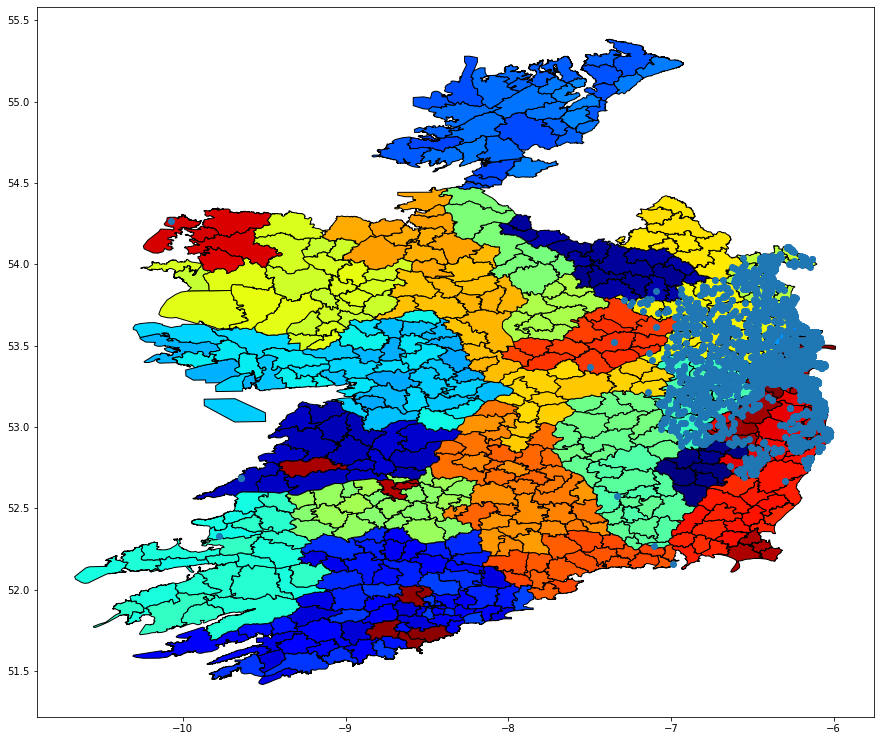

In [70]:
fig,ax = plt.subplots(figsize = (15,15))
gardai_gdf.plot(aspect = 1, ax = ax, cmap = 'jet', edgecolor = 'black')
ppr_gdf.plot(ax = ax)

#### Merge the Gardai Boudnary with GDF

In [71]:
ppr_gdf.shape

(23188, 81)

In [72]:
ppr_gdf = gpd.sjoin(ppr_gdf, gardai_gdf, how="left", predicate='within')

# dropping irrelenvant colunns
ppr_gdf = ppr_gdf.drop(['index_right'], axis=1)

ppr_gdf.head(1).transpose()

C:\Users\Karina\AppData\Local\Temp\ipykernel_11020\2592457480.py:1: UserWarning:

CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:3857
Right CRS: EPSG:4326




23283
date                                                             2022-06-30 00:00:00
month_year                                                                   2022-06
total_address                      25 FINGAL STREET, OFF CORK STREET, DUBLIN 8, D...
formatted_address                  25 FINGAL ST, SAINT CATHERINE'S, DUBLIN, D08 Y...
input_string                       25 FINGAL STREET, OFF CORK STREET, DUBLIN 8, D...
eircode                                                                      D08Y2Y6
price                                                                    40000.00000
not_full_market_price                                                             No
vat_exclusive                                                                     No
description                                    Second-Hand Dwelling house /Apartment
size_description                                                        Unknown Size
eircode_availability                                               EIRCODE AVAILABLE
latitude                                                                    53.33537
longitude                                                                   -6.28824
geometry                                               POINT (-6.2882437 53.3353729)
eircode_name                                                                     D08
eircode_description                                                         DUBLIN 8
area_in_km2_eircode                                                         12.70079
lea                                                        SOUTH WEST INNER CITY LEA
area_in_km2_lea                                                              5.38274
smallest_guid                                   4c07d11e-39c2-851d-e053-ca3ca8c0ca7f
council                                                   DUBLIN CITY COUNTY COUNCIL
county                                                                        DUBLIN
small_area_name                                                     MERCHANTS QUAY F
small_area_guid_area_in_km2                                                  0.01295
house_bungalow                                                             107.00000
flat_apartment                                                              10.00000
bed_sit                                                                      0.00000
caravan_mobile_home                                                          0.00000
type_of_accommodation_not_stated                                             2.00000
total_type_of_accommodation                                                119.00000
pre_1919                                                                    78.00000
1919_1945                                                                    8.00000
1946_1960                                                                    5.00000
1961_1970                                                                    3.00000
1971_1980                                                                    5.00000
1981_1990                                                                   11.00000
1991_2000                                                                    6.00000
2001_2010                                                                    1.00000
2011_or_later                                                                0.00000
year_built_not_stated                                                        2.00000
total_year_built                                                           119.00000
1_room                                                                       7.00000
2_rooms                                                                     37.00000
3_rooms                                                                     33.00000
4_rooms                                                                     28.00000
5_rooms                                                                      5.00000

In [73]:
# checking shape
print("The dataset has {} rows and {} columns.".format(*ppr_gdf.shape))

The dataset has 23188 rows and 83 columns.


In [74]:
# checking for missing data
print('Nan in each columns' , ppr_gdf.isna().sum(), sep='\n')
# no missing data

Nan in each columns
date                                   0
month_year                             0
total_address                          0
formatted_address                      0
input_string                           0
eircode                                0
price                                  0
not_full_market_price                  0
vat_exclusive                          0
description                            0
size_description                       0
eircode_availability                   0
latitude                               0
longitude                              0
geometry                               0
eircode_name                           0
eircode_description                    0
area_in_km2_eircode                    0
lea                                    2
area_in_km2_lea                        2
smallest_guid                          8
council                                8
county                                 8
small_area_name                      

##### Missing Values in gardai

In [75]:
ppr_gdf['county'][ppr_gdf['station'].isnull()].unique()

array(['DUBLIN', 'WICKLOW'], dtype=object)

In [76]:
ppr_gdf['county'][ppr_gdf['station'].isnull()].shape

(321,)

In [77]:
ppr_gdf[['county']][ppr_gdf['station'].isnull()].groupby(['county']).size()

county
DUBLIN     316
WICKLOW      5
dtype: int64

In [78]:
ppr_gdf.columns
# ppr_gdf[['county', 'electoral_divisions']][ppr_gdf['station'].isnull()].groupby(['county', 'electoral_divisions']).size()

Index(['date', 'month_year', 'total_address', 'formatted_address',
       'input_string', 'eircode', 'price', 'not_full_market_price',
       'vat_exclusive', 'description', 'size_description',
       'eircode_availability', 'latitude', 'longitude', 'geometry',
       'eircode_name', 'eircode_description', 'area_in_km2_eircode', 'lea',
       'area_in_km2_lea', 'smallest_guid', 'council', 'county',
       'small_area_name', 'small_area_guid_area_in_km2', 'house_bungalow',
       'flat_apartment', 'bed_sit', 'caravan_mobile_home',
       'type_of_accommodation_not_stated', 'total_type_of_accommodation',
       'pre_1919', '1919_1945', '1946_1960', '1961_1970', '1971_1980',
       '1981_1990', '1991_2000', '2001_2010', '2011_or_later',
       'year_built_not_stated', 'total_year_built', '1_room', '2_rooms',
       '3_rooms', '4_rooms', '5_rooms', '6_rooms', '7_rooms',
       '8_or_more_rooms', 'number_of_rooms_not_stated',
       'total_number_of_rooms', 'house_bungalow_%', 'flat_apartme

In [79]:
ppr_gdf['station'] = ppr_gdf['station'].fillna('STATION NOT PROVIDED')

In [80]:
mean_crime_selected_counties = ppr_gdf[(ppr_gdf['county'] == 'WICKLOW') |
        (ppr_gdf['county'] == 'LOUTH') |
        (ppr_gdf['county'] == 'KILDARE') |
        (ppr_gdf['county'] == 'DUBLIN') |
        (ppr_gdf['county'] == 'MEATH')].groupby(['county'])['crime_total'].mean().to_frame('mean_crime_per_county').reset_index()

In [81]:
ppr_gdf['crime_total'][(ppr_gdf['station'] == 'STATION NOT PROVIDED') &
                      (ppr_gdf['county'] == 'DUBLIN')] = 2139

ppr_gdf['crime_total'][(ppr_gdf['station'] == 'STATION NOT PROVIDED') &
                      (ppr_gdf['county'] == 'WICKLOW')] = 558

C:\Users\Karina\AppData\Local\Temp\ipykernel_11020\1778383751.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Karina\AppData\Local\Temp\ipykernel_11020\1778383751.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [82]:
sum_crime_selected_counties = ppr_gdf[(ppr_gdf['county'] == 'WICKLOW') |
        (ppr_gdf['county'] == 'LOUTH') |
        (ppr_gdf['county'] == 'KILDARE') |
        (ppr_gdf['county'] == 'DUBLIN') |
        (ppr_gdf['county'] == 'MEATH')].groupby(['county'])['crime_total'].sum().to_frame('sum_crime_per_county').reset_index()

sum_crime_selected_counties = pd.DataFrame(sum_crime_selected_counties).reset_index(drop =  True)
sum_crime_selected_counties['% of crime_total'] = sum_crime_selected_counties['sum_crime_per_county'] /sum_crime_selected_counties['sum_crime_per_county'].sum()
print(sum_crime_selected_counties)

    county  sum_crime_per_county  % of crime_total
0   DUBLIN        31699972.00000           0.82036
1  KILDARE         2113443.00000           0.05469
2    LOUTH         2318309.00000           0.06000
3    MEATH         1575815.00000           0.04078
4  WICKLOW          933925.00000           0.02417


In [83]:
ppr_gdf.shape

(23188, 83)

In [84]:
# checking for missing data
print('Nan in each columns' , ppr_gdf.isna().sum(), sep='\n')
# no missing data

Nan in each columns
date                                 0
month_year                           0
total_address                        0
formatted_address                    0
input_string                         0
eircode                              0
price                                0
not_full_market_price                0
vat_exclusive                        0
description                          0
size_description                     0
eircode_availability                 0
latitude                             0
longitude                            0
geometry                             0
eircode_name                         0
eircode_description                  0
area_in_km2_eircode                  0
lea                                  2
area_in_km2_lea                      2
smallest_guid                        8
council                              8
county                               8
small_area_name                      8
small_area_guid_area_in_km2          8
house

# Airbnb Data

In [85]:
airbnb = pd.read_csv('Data/merge_airbnb_listing_and_cal.csv')

In [86]:
airbnb.columns

Index(['id', 'latitude', 'longitude', 'room_type', 'host_id', 'price',
       'rent_pressure_zones', 'availability', 'permission', 'geometry',
       'council', 'smallest_guid', 'small_area_name',
       'small_area_guid_area_in_km2', 'eircode_name', 'eircode_description',
       'area_in_km2_eircode', 'lea', 'county', 'area_in_km2_lea',
       'electoral_divisions', 'area_in_km2_ed', 'gda', 'month_year'],
      dtype='object')

In [87]:
airbnb.shape

(170610, 24)

In [88]:
# checking for missing data
print('Nan in each columns' , airbnb.isna().sum(), sep='\n')
# no missing data

Nan in each columns
id                             0
latitude                       0
longitude                      0
room_type                      0
host_id                        0
price                          0
rent_pressure_zones            0
availability                   0
permission                     0
geometry                       0
council                        0
smallest_guid                  0
small_area_name                0
small_area_guid_area_in_km2    0
eircode_name                   0
eircode_description            0
area_in_km2_eircode            0
lea                            0
county                         0
area_in_km2_lea                0
electoral_divisions            0
area_in_km2_ed                 0
gda                            0
month_year                     0
dtype: int64


In [89]:
# Converting dataframe to geodataframe
airbnb_gdf = gpd.GeoDataFrame(airbnb,
                       crs = {'init' :'epsg:3857'},
                       geometry=gpd.points_from_xy(airbnb.longitude, airbnb.latitude))

C:\Users\Karina\miniconda3\lib\site-packages\pyproj\crs\crs.py:130: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6



In [95]:
len(airbnb_gdf['id'].unique())

22268

In [96]:
airbnb_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 170610 entries, 0 to 170609
Data columns (total 24 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   id                           170610 non-null  float64 
 1   latitude                     170610 non-null  float64 
 2   longitude                    170610 non-null  float64 
 3   room_type                    170610 non-null  object  
 4   host_id                      170610 non-null  float64 
 5   price                        170610 non-null  float64 
 6   rent_pressure_zones          170610 non-null  object  
 7   availability                 170610 non-null  float64 
 8   permission                   170610 non-null  object  
 9   geometry                     170610 non-null  geometry
 10  council                      170610 non-null  object  
 11  smallest_guid                170610 non-null  object  
 12  small_area_name              170610 

In [97]:
# airbnb_gdf.to_file('Data/Shapefiles/airbnb_gdf.geojson', index=False)

#### Grouping by Eircode and month_year

In [98]:
# this will be blended with the ppr data later
airbnb_eircode_month = airbnb_gdf.groupby(['month_year', 'eircode_name'#, 'area_in_km2_lea'
                                      ])['id'].nunique().to_frame('eircode_no_of_listings').reset_index()

airbnb_eircode_month.head(20)

month_year eircode_name  eircode_no_of_listings
0     2021-07          A41                       1
1     2021-07          A42                       4
2     2021-07          A45                       1
3     2021-07          A63                      28
4     2021-07          A67                      88
5     2021-07          A75                      26
6     2021-07          A81                      14
7     2021-07          A82                      67
8     2021-07          A83                       5
9     2021-07          A84                      17
10    2021-07          A85                      17
11    2021-07          A86                       4
12    2021-07          A91                     119
13    2021-07          A92                     102
14    2021-07          A94                      52
15    2021-07          A96                      79
16    2021-07          A98                      65
17    2021-07          C15                     125
18    2021-07          D01                     299
19    2021-07          D02                     259

In [99]:
fig = px.histogram(airbnb_eircode_month, x="eircode_no_of_listings")
fig.show()

In [100]:
airbnb_eircode_month['eircode_no_of_listings'].describe()

count   1632.00000
mean     104.07108
std      173.90004
min        1.00000
25%       20.00000
50%       48.00000
75%      107.00000
max     1500.00000
Name: eircode_no_of_listings, dtype: float64

#### Grouping by SA and month_year

In [102]:
# this will be blended with the ppr data later
airbnb_eircode_month = airbnb_gdf.groupby(['month_year', 'smallest_guid'#, 'area_in_km2_lea'
                                      ])['id'].nunique().to_frame('small_area_no_of_listings').reset_index()

airbnb_eircode_month.head(20)

month_year                         smallest_guid  small_area_no_of_listings
0     2021-07  4c07d11d-f3b1-851d-e053-ca3ca8c0ca7f                          1
1     2021-07  4c07d11d-f3b8-851d-e053-ca3ca8c0ca7f                          1
2     2021-07  4c07d11d-f3b9-851d-e053-ca3ca8c0ca7f                          1
3     2021-07  4c07d11d-f3bb-851d-e053-ca3ca8c0ca7f                          1
4     2021-07  4c07d11d-f3be-851d-e053-ca3ca8c0ca7f                          1
5     2021-07  4c07d11d-f3c1-851d-e053-ca3ca8c0ca7f                          1
6     2021-07  4c07d11d-f3c2-851d-e053-ca3ca8c0ca7f                          4
7     2021-07  4c07d11d-f3c4-851d-e053-ca3ca8c0ca7f                          1
8     2021-07  4c07d11d-f3cb-851d-e053-ca3ca8c0ca7f                         13
9     2021-07  4c07d11d-f3d3-851d-e053-ca3ca8c0ca7f                          1
10    2021-07  4c07d11d-f3d4-851d-e053-ca3ca8c0ca7f                          3
11    2021-07  4c07d11d-f3d7-851d-e053-ca3ca8c0ca7f                          2
12    2021-07  4c07d11d-f3d9-851d-e053-ca3ca8c0ca7f                          2
13    2021-07  4c07d11d-f3dd-851d-e053-ca3ca8c0ca7f                          1
14    2021-07  4c07d11d-f3de-851d-e053-ca3ca8c0ca7f                          2
15    2021-07  4c07d11d-f3e1-851d-e053-ca3ca8c0ca7f                          1
16    2021-07  4c07d11d-f3e3-851d-e053-ca3ca8c0ca7f                          1
17    2021-07  4c07d11d-f3e5-851d-e053-ca3ca8c0ca7f                          1
18    2021-07  4c07d11d-f3e7-851d-e053-ca3ca8c0ca7f                          2
19    2021-07  4c07d11d-f3e8-851d-e053-ca3ca8c0ca7f                          2

In [103]:
fig = px.histogram(airbnb_eircode_month, x="small_area_no_of_listings")
fig.show()

In [104]:
airbnb_eircode_month['small_area_no_of_listings'].describe()

count   68418.00000
mean        2.48245
std         3.01859
min         1.00000
25%         1.00000
50%         1.00000
75%         3.00000
max        69.00000
Name: small_area_no_of_listings, dtype: float64

#### Grouping by LEA and month_year

In [118]:
# this will be blended with the ppr data later
airbnb_lea_month = airbnb_gdf.groupby(['month_year', 'lea'#, 'area_in_km2_lea'
                                      ])['id'].nunique().to_frame('lea_no_of_listings').reset_index()

airbnb_lea_month.head(20)

month_year                          lea  lea_no_of_listings
0     2021-07          ADARE-RATHKEALE LEA                  66
1     2021-07                    ARDEE LEA                  22
2     2021-07                   ARKLOW LEA                  70
3     2021-07         ARTANE-WHITEHALL LEA                  80
4     2021-07                ASHBOURNE LEA                  55
5     2021-07         ATHENRY-ORANMORE LEA                 108
6     2021-07                  ATHLONE LEA                  83
7     2021-07                     ATHY LEA                  45
8     2021-07  BAILIEBOROUGH-COOTEHILL LEA                  36
9     2021-07               BALBRIGGAN LEA                  18
10    2021-07                  BALLINA LEA                  79
11    2021-07              BALLINAMORE-LEA                  53
12    2021-07              BALLINASLOE LEA                  29
13    2021-07          BALLYBAY-CLONES LEA                  37
14    2021-07     BALLYFERMOT-DRIMNAGH LEA                  35
15    2021-07           BALLYJAMESDUFF LEA                  33
16    2021-07               BALLYMAHON LEA                  12
17    2021-07     BALLYMOTE-TOBERCURRY LEA                 120
18    2021-07         BALLYMUN-FINGLAS LEA                  22
19    2021-07              BALTINGLASS LEA                  99

In [119]:
fig = px.histogram(airbnb_lea_month, x="lea_no_of_listings")
fig.show()

In [120]:
airbnb_lea_month['lea_no_of_listings'].describe()

count   1980.00000
mean      85.77980
std      116.15978
min        3.00000
25%       26.00000
50%       46.00000
75%       89.00000
max      867.00000
Name: lea_no_of_listings, dtype: float64

In [121]:
# setting a condition similar to SYDNEY
conditions = [
    (airbnb_lea_month['lea_no_of_listings'] < 10),
    (airbnb_lea_month['lea_no_of_listings'] >= 10) & (airbnb_lea_month['lea_no_of_listings'] < 20),
    (airbnb_lea_month['lea_no_of_listings'] >= 20) & (airbnb_lea_month['lea_no_of_listings'] < 50),
    (airbnb_lea_month['lea_no_of_listings'] >= 50) & (airbnb_lea_month['lea_no_of_listings'] < 150),
    (airbnb_lea_month['lea_no_of_listings'] >= 150) & (airbnb_lea_month['lea_no_of_listings'] < 300),
    (airbnb_lea_month['lea_no_of_listings'] >= 300)
]

values = ['<10 AIRBNB LISTINGS', 
          '10-19 AIRBNB LISTINGS', 
          '20-49 AIRBNB LISTINGS',
          '50-149 AIRBNB LISTINGS',
          '150-299 AIRBNB LISTINGS',
          '>300 AIRBNB LISTINGS',
         ]

airbnb_lea_month['range_lea_listings'] = np.select(conditions, values)

# airbnb_lea_month['lea'] = airbnb_lea_month['lea'].str.replace(' LEA|-LEA', '')
# selecting relevant columsn
airbnb_lea_month = airbnb_lea_month[[
    'month_year',
    'lea',
    'range_lea_listings',
    'lea_no_of_listings'
    ]] 

In [124]:
print(airbnb_lea_month[airbnb_lea_month['lea'].str.contains('BLANCHARDSTOWN-MULHUDDART')])

     month_year                            lea     range_lea_listings  \
25      2021-07  BLANCHARDSTOWN-MULHUDDART LEA  20-49 AIRBNB LISTINGS   
190     2021-08  BLANCHARDSTOWN-MULHUDDART LEA  20-49 AIRBNB LISTINGS   
355     2021-09  BLANCHARDSTOWN-MULHUDDART LEA  20-49 AIRBNB LISTINGS   
520     2021-10  BLANCHARDSTOWN-MULHUDDART LEA  10-19 AIRBNB LISTINGS   
685     2021-11  BLANCHARDSTOWN-MULHUDDART LEA  20-49 AIRBNB LISTINGS   
850     2021-12  BLANCHARDSTOWN-MULHUDDART LEA  20-49 AIRBNB LISTINGS   
1015    2022-01  BLANCHARDSTOWN-MULHUDDART LEA  10-19 AIRBNB LISTINGS   
1180    2022-02  BLANCHARDSTOWN-MULHUDDART LEA  10-19 AIRBNB LISTINGS   
1345    2022-03  BLANCHARDSTOWN-MULHUDDART LEA  20-49 AIRBNB LISTINGS   
1510    2022-04  BLANCHARDSTOWN-MULHUDDART LEA  10-19 AIRBNB LISTINGS   
1675    2022-05  BLANCHARDSTOWN-MULHUDDART LEA  10-19 AIRBNB LISTINGS   
1840    2022-06  BLANCHARDSTOWN-MULHUDDART LEA  10-19 AIRBNB LISTINGS   

      lea_no_of_listings  
25                    2

In [126]:
# Merging the LEA
ppr_gdf = pd.merge(ppr_gdf, airbnb_lea_month, on=['month_year','lea'], how='left')
ppr_gdf.shape

(23188, 85)

In [127]:
ppr_gdf['lea'].unique()

array(['SOUTH WEST INNER CITY LEA', 'SOUTH EAST INNER CITY LEA',
       'BALLYFERMOT-DRIMNAGH LEA', 'CABRA-GLASNEVIN LEA', 'BLACKROCK LEA',
       'STILLORGAN LEA', 'DUN LAOGHAIRE LEA', 'GLENCULLEN-SANDYFORD LEA',
       'PEMBROKE LEA', 'DUNDALK SOUTH LEA', 'DUNDALK-CARLINGFORD LEA',
       'ARDEE LEA', 'KILLINEY-SHANKILL LEA', 'KIMMAGE-RATHMINES LEA',
       'HOWTH-MALAHIDE LEA', 'RUSH-LUSK LEA', 'BALBRIGGAN LEA',
       'NORTH INNER CITY LEA', 'CLONTARF LEA', 'LAYTOWN  BETTYSTOWN-LEA',
       'DROGHEDA URBAN LEA', 'DROGHEDA RURAL LEA', 'ASHBOURNE LEA',
       'TALLAGHT SOUTH LEA', 'TALLAGHT CENTRAL LEA',
       'FIRHOUSE-BOHERNABREENA LEA', 'CLONDALKIN LEA', 'BALTINGLASS LEA',
       'RATOATH LEA', 'CASTLEKNOCK LEA', 'BLANCHARDSTOWN-MULHUDDART LEA',
       'ONGAR LEA', 'SWORDS LEA', 'GREYSTONES LEA', 'WICKLOW LEA',
       'LUCAN LEA', 'PALMERSTOWN-FONTHILL LEA', 'ARTANE-WHITEHALL LEA',
       'DONAGHMEDE LEA', 'LEIXLIP LEA', 'CELBRIDGE LEA', 'MAYNOOTH LEA',
       'NAAS LEA', 'TRIM L

In [128]:
airbnb_gdf['lea'][(airbnb_gdf['county'].str.contains('DUBLIN|LOUTH|WICKLOW|KILDARE'))| (airbnb_gdf['county'] =='MEATH')].unique()

array(['SOUTH EAST INNER CITY LEA', 'PEMBROKE LEA',
       'NORTH INNER CITY LEA', 'SOUTH WEST INNER CITY LEA',
       'CABRA-GLASNEVIN LEA', 'KIMMAGE-RATHMINES LEA',
       'HOWTH-MALAHIDE LEA', 'DUNDALK-CARLINGFORD LEA',
       'BALLYMUN-FINGLAS LEA', 'ARTANE-WHITEHALL LEA', 'CLONTARF LEA',
       'STILLORGAN LEA', 'BALTINGLASS LEA', 'WICKLOW LEA', 'SWORDS LEA',
       'RUSH-LUSK LEA', 'RATOATH LEA', 'NEWBRIDGE LEA', 'NAAS LEA',
       'LAYTOWN  BETTYSTOWN-LEA', 'KILLINEY-SHANKILL LEA', 'KELLS LEA',
       'RATHFARNHAM-TEMPLEOGUE LEA', 'GLENCULLEN-SANDYFORD LEA',
       'KILDARE LEA', 'NAVAN LEA', 'DONAGHMEDE LEA', 'DROGHEDA URBAN LEA',
       'DROGHEDA RURAL LEA', 'TALLAGHT CENTRAL LEA', 'TRIM LEA',
       'CLONDALKIN LEA', 'CASTLEKNOCK LEA', 'DUN LAOGHAIRE LEA',
       'DUNDALK SOUTH LEA', 'LUCAN LEA', 'BLANCHARDSTOWN-MULHUDDART LEA',
       'LEIXLIP LEA', 'ONGAR LEA', 'BLACKROCK LEA', 'BRAY WEST LEA',
       'BALLYFERMOT-DRIMNAGH LEA', 'PALMERSTOWN-FONTHILL LEA', 'ATHY LEA',
     

In [129]:
# checking for missing data
print('Nan in each columns' , ppr_gdf.isna().sum(), sep='\n')

Nan in each columns
date                                 0
month_year                           0
total_address                        0
formatted_address                    0
input_string                         0
eircode                              0
price                                0
not_full_market_price                0
vat_exclusive                        0
description                          0
size_description                     0
eircode_availability                 0
latitude                             0
longitude                            0
geometry                             0
eircode_name                         0
eircode_description                  0
area_in_km2_eircode                  0
lea                                  2
area_in_km2_lea                      2
smallest_guid                        8
council                              8
county                               8
small_area_name                      8
small_area_guid_area_in_km2          8
house

In [130]:
ppr_gdf['lea_no_of_listings'] = ppr_gdf['lea_no_of_listings'].fillna(0)
ppr_gdf['range_lea_listings'] = ppr_gdf['range_lea_listings'].fillna('No Airbnbs Present')

In [132]:
ppr_gdf['lea_no_of_listings'].describe()

count   23188.00000
mean       67.60794
std        94.89161
min         0.00000
25%        20.00000
50%        33.00000
75%        74.00000
max       607.00000
Name: lea_no_of_listings, dtype: float64

#### Grouping by Electoral Division and month_year

In [133]:
# this will be blended with the ppr data later
airbnb_electoral_divisions_month = airbnb_gdf.groupby(['month_year', 'electoral_divisions'#, 'area_in_km2_ed'
                                                      ])['id'].nunique().to_frame('ed_no_of_listings').reset_index()

airbnb_electoral_divisions_month.head(20)

month_year       electoral_divisions  ed_no_of_listings
0     2021-07      ABBEY C, CO.LIMERICK                  2
1     2021-07      ABBEY D, CO.LIMERICK                  1
2     2021-07     ABBEY WEST, CO.GALWAY                  7
3     2021-07           ABBEY, CO.CLARE                 16
4     2021-07     ABBEYDORNEY, CO.KERRY                  3
5     2021-07   ABBEYFEALE, CO.LIMERICK                  7
6     2021-07       ABBEYLEIX, CO.LAOIS                  1
7     2021-07           ACHILL, CO.MAYO                  9
8     2021-07    ACHONRY WEST, CO.SLIGO                  6
9     2021-07     ADAMSTOWN, CO.WEXFORD                  1
10    2021-07  ADARE NORTH, CO.LIMERICK                  5
11    2021-07  ADARE SOUTH, CO.LIMERICK                 11
12    2021-07       ADDERGOOLE, CO.MAYO                  8
13    2021-07         ADRIGOLE, CO.CORK                  7
14    2021-07      AGHABOG, CO.MONAGHAN                  1
15    2021-07    AGHACASHEL, CO.LEITRIM                  1
16    2021-07         AGHADOE, CO.KERRY                  8
17    2021-07   AGHADOWN NORTH, CO.CORK                  2
18    2021-07   AGHADOWN SOUTH, CO.CORK                  2
19    2021-07     AGHAFIN, CO.ROSCOMMON                  1

In [134]:
airbnb_electoral_divisions_month['ed_no_of_listings'].describe()

count   26582.00000
mean        6.38944
std        12.08030
min         1.00000
25%         1.00000
50%         3.00000
75%         7.00000
max       234.00000
Name: ed_no_of_listings, dtype: float64

In [135]:
fig = px.histogram(airbnb_electoral_divisions_month, x="ed_no_of_listings")
fig.show()

In [136]:
# setting a condition similar to SYDNEY
conditions = [
    (airbnb_electoral_divisions_month['ed_no_of_listings'] < 5),
    (airbnb_electoral_divisions_month['ed_no_of_listings'] >= 5) & (airbnb_electoral_divisions_month['ed_no_of_listings'] < 10),
    (airbnb_electoral_divisions_month['ed_no_of_listings'] >= 10) & (airbnb_electoral_divisions_month['ed_no_of_listings'] <20),
    (airbnb_electoral_divisions_month['ed_no_of_listings'] >= 20) & (airbnb_electoral_divisions_month['ed_no_of_listings'] < 30),
    (airbnb_electoral_divisions_month['ed_no_of_listings'] >= 30) & (airbnb_electoral_divisions_month['ed_no_of_listings'] < 400),
    (airbnb_electoral_divisions_month['ed_no_of_listings'] >= 40)
]

values = ['<5 Airbnb listings', 
          '5-9 Airbnb listings', 
          '10-19 Airbnb listings', 
          '20-29 Airbnb listings',
          '30-39 Airbnb listings',
          '<40 Airbnb listings',
         ]

airbnb_electoral_divisions_month['range_ed_no_of_listings'] = np.select(conditions, values)

# selecting relevant columsn
airbnb_electoral_divisions_month = airbnb_electoral_divisions_month[[
    'month_year',
    'electoral_divisions',
    'range_ed_no_of_listings',
    'ed_no_of_listings'
    ]] 

In [137]:
print(airbnb_electoral_divisions_month[airbnb_electoral_divisions_month['electoral_divisions']=='GLENCULLEN, CO.DUBLIN'])

      month_year    electoral_divisions range_ed_no_of_listings  \
1035     2021-07  GLENCULLEN, CO.DUBLIN   20-29 Airbnb listings   
3257     2021-08  GLENCULLEN, CO.DUBLIN   30-39 Airbnb listings   
5515     2021-09  GLENCULLEN, CO.DUBLIN   30-39 Airbnb listings   
7753     2021-10  GLENCULLEN, CO.DUBLIN   20-29 Airbnb listings   
10005    2021-11  GLENCULLEN, CO.DUBLIN   30-39 Airbnb listings   
12295    2021-12  GLENCULLEN, CO.DUBLIN   20-29 Airbnb listings   
14507    2022-01  GLENCULLEN, CO.DUBLIN   10-19 Airbnb listings   
16686    2022-02  GLENCULLEN, CO.DUBLIN   10-19 Airbnb listings   
18891    2022-03  GLENCULLEN, CO.DUBLIN   20-29 Airbnb listings   
21079    2022-04  GLENCULLEN, CO.DUBLIN   10-19 Airbnb listings   
23245    2022-05  GLENCULLEN, CO.DUBLIN   10-19 Airbnb listings   
25433    2022-06  GLENCULLEN, CO.DUBLIN   10-19 Airbnb listings   

       ed_no_of_listings  
1035                  29  
3257                  32  
5515                  32  
7753                

In [138]:
# merging PPR data with Small Area 
ppr_gdf = pd.merge(ppr_gdf, airbnb_electoral_divisions_month, on=['month_year','electoral_divisions'],
                      how = 'left')
ppr_gdf.shape

(23188, 87)

In [139]:
# checking for missing data
print('Nan in each columns' , ppr_gdf.isna().sum(), sep='\n')
# no missing data

Nan in each columns
date                                    0
month_year                              0
total_address                           0
formatted_address                       0
input_string                            0
eircode                                 0
price                                   0
not_full_market_price                   0
vat_exclusive                           0
description                             0
size_description                        0
eircode_availability                    0
latitude                                0
longitude                               0
geometry                                0
eircode_name                            0
eircode_description                     0
area_in_km2_eircode                     0
lea                                     2
area_in_km2_lea                         2
smallest_guid                           8
council                                 8
county                                  8
small_area_nam

In [140]:
ppr_gdf['range_ed_no_of_listings'] = ppr_gdf['range_ed_no_of_listings'].fillna('No Airbnbs Present')
ppr_gdf['ed_no_of_listings'] = ppr_gdf['ed_no_of_listings'].fillna(0)

# Full Dataset

In [141]:
ppr_gdf.head(1).transpose()

0
date                                                             2022-06-30 00:00:00
month_year                                                                   2022-06
total_address                      25 FINGAL STREET, OFF CORK STREET, DUBLIN 8, D...
formatted_address                  25 FINGAL ST, SAINT CATHERINE'S, DUBLIN, D08 Y...
input_string                       25 FINGAL STREET, OFF CORK STREET, DUBLIN 8, D...
eircode                                                                      D08Y2Y6
price                                                                    40000.00000
not_full_market_price                                                             No
vat_exclusive                                                                     No
description                                    Second-Hand Dwelling house /Apartment
size_description                                                        Unknown Size
eircode_availability                                               EIRCODE AVAILABLE
latitude                                                                    53.33537
longitude                                                                   -6.28824
geometry                                               POINT (-6.2882437 53.3353729)
eircode_name                                                                     D08
eircode_description                                                         DUBLIN 8
area_in_km2_eircode                                                         12.70079
lea                                                        SOUTH WEST INNER CITY LEA
area_in_km2_lea                                                              5.38274
smallest_guid                                   4c07d11e-39c2-851d-e053-ca3ca8c0ca7f
council                                                   DUBLIN CITY COUNTY COUNCIL
county                                                                        DUBLIN
small_area_name                                                     MERCHANTS QUAY F
small_area_guid_area_in_km2                                                  0.01295
house_bungalow                                                             107.00000
flat_apartment                                                              10.00000
bed_sit                                                                      0.00000
caravan_mobile_home                                                          0.00000
type_of_accommodation_not_stated                                             2.00000
total_type_of_accommodation                                                119.00000
pre_1919                                                                    78.00000
1919_1945                                                                    8.00000
1946_1960                                                                    5.00000
1961_1970                                                                    3.00000
1971_1980                                                                    5.00000
1981_1990                                                                   11.00000
1991_2000                                                                    6.00000
2001_2010                                                                    1.00000
2011_or_later                                                                0.00000
year_built_not_stated                                                        2.00000
total_year_built                                                           119.00000
1_room                                                                       7.00000
2_rooms                                                                     37.00000
3_rooms                                                                     33.00000
4_rooms                                                                     28.00000
5_rooms                                                                      5.00000
6_r

#### Cleaning up Counties 

In [142]:
ppr_gdf['county'].unique()

array(['DUBLIN', 'LOUTH', 'MEATH', 'WICKLOW', 'KILDARE', 'OFFALY', nan,
       'CARLOW', 'CAVAN', 'CLARE', 'WESTMEATH', 'WEXFORD', 'KILKENNY',
       'WATERFORD', 'LAOIS', 'KERRY', 'MAYO'], dtype=object)

In [143]:
outliers = ppr_gdf[ppr_gdf['county'].isnull()]
outliers

date month_year  \
12927 2022-03-24    2022-03   
13041 2022-01-28    2022-01   
13057 2022-01-17    2022-01   
13245 2021-08-24    2021-08   
13304 2021-07-16    2021-07   
17449 2021-12-02    2021-12   
18783 2022-06-14    2022-06   
19201 2021-07-22    2021-07   

                                           total_address  \
12927  6 ROS MOR VIEW SCHOLARSTOWN ROAD, KNOCKLYON, D...   
13041  6 BEECH WALK, BROOKWOOD, SCHOLARSTOWN ROAD DUB...   
13057  SCHOLARSTOWN HOUSE, SCHOLARSTOWN ROAD, TEMPLEO...   
13245  23 BEECH WALK, BROOKWOOD, SCHOLARSTOWN ROAD DU...   
13304  14 THE HALL, SCHOLARSTOWN WOOD, SCHOLARSTOWN R...   
17449  37 THE KELLSYS BAY PROMENADE, SKERRIES, DUBLIN...   
18783  187 GRIFFITH ROAD, FINGLAS EAST, DUBLIN 11, DU...   
19201  59 GRIFFITH PARADE, GLASNEVIN, DUBLIN, DUBLIN,...   

                                       formatted_address  \
12927                   SCHOLARSTOWN RD, DUBLIN, IRELAND   
13041                   SCHOLARSTOWN RD, DUBLIN, IRELAND   
13057                   SCHOLARSTOWN RD, DUBLIN, IRELAND   
13245                   SCHOLARSTOWN RD, DUBLIN, IRELAND   
13304                   SCHOLARSTOWN RD, DUBLIN, IRELAND   
17449  37 KELLY'S BAY PROMENADE, ARDLA, SKERRIES, CO....   
18783  187 GRIFFITH RD, FINGLAS EAST, DUBLIN 11, D11 ...   
19201  59 GRIFFITH PARADE, FINGLAS EAST, DUBLIN 11, D...   

                                            input_string              eircode  \
12927  6 ROS MOR VIEW SCHOLARSTOWN ROAD, KNOCKLYON, D...              D16DA06   
13041  6 BEECH WALK, BROOKWOOD, SCHOLARSTOWN ROAD DUB...              D16K7X3   
13057  SCHOLARSTOWN HOUSE, SCHOLARSTOWN ROAD, TEMPLEO...              D16E2H9   
13245  23 BEECH WALK, BROOKWOOD, SCHOLARSTOWN ROAD DU...              D16Y0E3   
13304  14 THE HALL, SCHOLARSTOWN WOOD, SCHOLARSTOWN R...              D16Y7P2   
17449  37 THE KELLSYS BAY PROMENADE, SKERRIES, DUBLIN...  EIRCODE UNAVAILABLE   
18783  187 GRIFFITH ROAD, FINGLAS EAST, DUBLIN 11, DU...              D11P7K3   
19201  59 GRIFFITH PARADE, GLASNEVIN, DUBLIN, DUBLIN,...              D11APF7   

              price not_full_market_price vat_exclusive  \
12927   51338.00000                    No            No   
13041  425000.00000                    No            No   
13057 1100000.00000                    No            No   
13245  660000.00000                    No            No   
13304  595000.00000                    No            No   
17449  405000.00000                    No            No   
18783  325000.00000                   Yes            No   
19201  345000.00000                    No            No   

                                 description size_description  \
12927  Second-Hand Dwelling house /Apartment     Unknown Size   
13041  Second-Hand Dwelling house /Apartment     Unknown Size   
13057  Second-Hand Dwelling house /Apartment     Unknown Size   
13245  Second-Hand Dwelling house /Apartment     Unknown Size   
13304  Second-Hand Dwelling house /Apartment     Unknown Size   
17449  Second-Hand Dwelling house /Apartment     Unknown Size   
18783  Second-Hand Dwelling house /Apartment     Unknown Size   
19201  Second-Hand Dwelling house /Apartment     Unknown Size   

      eircode_availability  latitude  longitude               geometry  \
12927    EIRCODE AVAILABLE  53.27937   -6.30970  POINT (-6.310 53.279)   
13041    EIRCODE AVAILABLE  53.27937   -6.30970  POINT (-6.310 53.279)   
13057    EIRCODE AVAILABLE  53.27937   -6.30970  POINT (-6.310 53.279)   
13245    EIRCODE AVAILABLE  53.27937   -6.30970  POINT (-6.310 53.279)   
13304    EIRCODE AVAILABLE  53.27937   -6.30970  POINT (-6.310 53.279)   
17449  EIRCODE UNAVAILABLE  53.58215   -6.13037  POINT (-6.130 53.582)   
18783    EIRCODE AVAILABLE  53.38365   -6.28507  POINT (-6.285 53.384)   
19201    EIRCODE AVAILABLE  53.38257   -6.28184  POINT (-6.282 53.383)   

      eircode_name eircode_description  area_in_km2_eircode  \
12927          D16           DUBLIN 16             38.02771   
13041    

<AxesSubplot:>

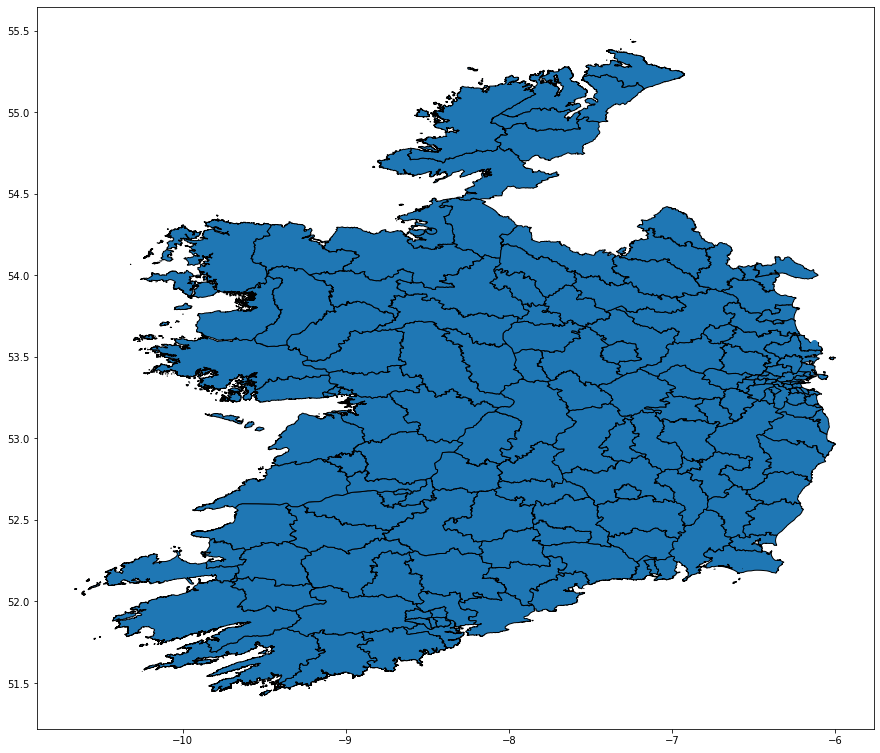

In [144]:
fig,ax = plt.subplots(figsize = (15,15))
LEA_gdf.plot(aspect = 1, ax = ax,  edgecolor = 'black')
outliers.plot(ax = ax)

In [145]:
ppr_gdf = ppr_gdf[~(ppr_gdf['county'].isnull())]


In [146]:
# examining properties that are incorrectly placed in county
outlietrs = ppr_gdf[~(ppr_gdf['county'].str.contains('DUBLIN|MEATH|WICKLOW|KILDARE|LOUTH'))  ]
outlietrs['county'].unique()

array(['OFFALY', 'CARLOW', 'CAVAN', 'CLARE', 'WEXFORD', 'KILKENNY',
       'WATERFORD', 'LAOIS', 'KERRY', 'MAYO'], dtype=object)

In [147]:
outlietrs.head()

date month_year  \
12599 2022-06-17    2022-06   
14741 2022-02-17    2022-02   
14932 2021-12-13    2021-12   
15383 2021-08-20    2021-08   
22691 2021-12-15    2021-12   

                                           total_address  \
12599  CLONSAST, RATHANGAN, KILDARE, KILDARE, R51NW68...   
14741  TYNNOCK COTTAGE, KILTEGAN, WICKLOW, WICKLOW, W...   
14932     TYNOCK, KILTEGAN, CO WICKLOW, WICKLOW, IRELAND   
15383       TYNOCKI, KILTEGAN, WICKLOW, WICKLOW, IRELAND   
22691         THE MANOR, LISLIN, MULLAGH, MEATH, IRELAND   

                                   formatted_address  \
12599  CLONSAST UPPER, CO. OFFALY, R51 NW68, IRELAND   
14741         TIKNOCK, CO. CARLOW, W91 RT9V, IRELAND   
14932                   TIKNOCK, CO. CARLOW, IRELAND   
15383                   TIKNOCK, CO. CARLOW, IRELAND   
22691                  LISLIN RD, CO. CAVAN, IRELAND   

                                            input_string              eircode  \
12599  CLONSAST, RATHANGAN, KILDARE, KILDARE, R51NW68...              R51NW68   
14741  TYNNOCK COTTAGE, KILTEGAN, WICKLOW, WICKLOW, W...              W91RT9V   
14932     TYNOCK, KILTEGAN, CO WICKLOW, WICKLOW, IRELAND  EIRCODE UNAVAILABLE   
15383       TYNOCKI, KILTEGAN, WICKLOW, WICKLOW, IRELAND  EIRCODE UNAVAILABLE   
22691         THE MANOR, LISLIN, MULLAGH, MEATH, IRELAND  EIRCODE UNAVAILABLE   

             price not_full_market_price vat_exclusive  \
12599 195000.00000                    No            No   
14741 196000.00000                    No            No   
14932 220000.00000                    No            No   
15383 320000.00000                    No            No   
22691 166085.00000                    No            No   

                                 description size_description  \
12599  Second-Hand Dwelling house /Apartment     Unknown Size   
14741  Second-Hand Dwelling house /Apartment     Unknown Size   
14932  Second-Hand Dwelling house /Apartment     Unknown Size   
15383  Second-Hand Dwelling house /Apartment     Unknown Size   
22691  Second-Hand Dwelling house /Apartment     Unknown Size   

      eircode_availability  latitude  longitude               geometry  \
12599    EIRCODE AVAILABLE  53.21392   -7.14226  POINT (-7.142 53.214)   
14741    EIRCODE AVAILABLE  52.89106   -6.61765  POINT (-6.618 52.891)   
14932  EIRCODE UNAVAILABLE  52.89355   -6.62893  POINT (-6.629 52.894)   
15383  EIRCODE UNAVAILABLE  52.89355   -6.62893  POINT (-6.629 52.894)   
22691  EIRCODE UNAVAILABLE  53.81832   -6.93824  POINT (-6.938 53.818)   

      eircode_name eircode_description  area_in_km2_eircode  \
12599          R51             KILDARE            236.91547   
14741          W91                NAAS           1248.17650   
14932          W91                NAAS           1248.17650   
15383          W91                NAAS           1248.17650   
22691          A82               KELLS           1117.51091   

                      lea  area_in_km2_lea  \
12599       EDENDERRY LEA        591.10319   
14741          TULLOW LEA        415.08742   
14932          TULLOW LEA        415.08742   
15383          TULLOW LEA        415.08742   
22691  BALLYJAMESDUFF LEA        605.44376   

                              smallest_guid                council  county  \
12599  4c07d11e-0fc1-851d-e053-ca3ca8c0ca7f  OFFALY COUNTY COUNCIL  OFFALY   
14741  4c07d11e-12ad-851d-e053-ca3ca8c0ca7f  CARLOW COUNTY COUNCIL  CARLOW   
14932  4c07d11e-12ad-851d-e053-ca3ca8c0ca7f  CARLOW COUNTY COUNCIL  CARLOW   
15383  4c07d11e-12ad-851d-e053-ca3ca8c0ca7f  CARLOW COUNTY COUNCIL  CARLOW   
22691  4c07d11e-0276-851d-e053-ca3ca8c0ca7f   CAVAN COUNTY COUNCIL   CAVAN   

      small_area_name  small_area_guid_area_in_km2  house_bungalow  \
12599       BRACKNAGH                     20.37501       101.00000   
14741         TIKNOCK                     10.75555       109.00000   
14932         TIKNOCK                     10.75555       109.00000   
15383         TIKNOCK                     10.75555

In [148]:
ppr_gdf = ppr_gdf[(ppr_gdf['county'].str.contains('DUBLIN|MEATH|WICKLOW|KILDARE|LOUTH')) &
          ~(ppr_gdf['county'].str.contains('WESTMEATH')) ]
ppr_gdf['county'].unique()

array(['DUBLIN', 'LOUTH', 'MEATH', 'WICKLOW', 'KILDARE'], dtype=object)

### Outliers

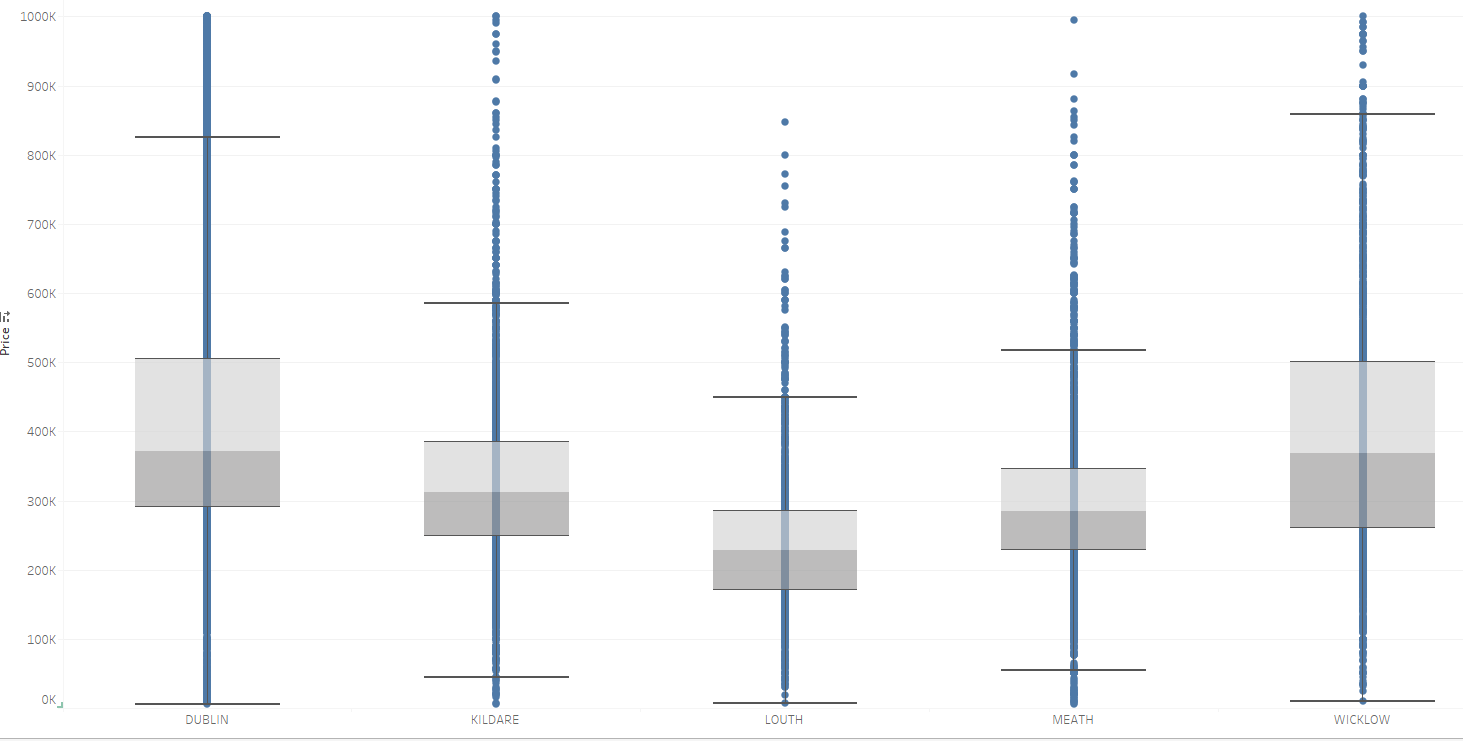

In [149]:
ppr_gdf['price'].describe()

count       23161.00000
mean       476875.55154
std       1443767.34622
min          5300.00000
25%        265000.00000
50%        350000.00000
75%        484581.00000
max     107488987.00000
Name: price, dtype: float64

In [150]:
# extractng all properties that are over €1m
price_outliers = ppr_gdf[ppr_gdf['price']>1000000]
price_outliers.shape

(992, 87)

In [151]:
price_outliers.head()

date month_year                                      total_address  \
50  2022-05-26    2022-05  1-16 AIRLIE GARDENS, BLOCK 30A, STREET HELEN'S...   
114 2022-04-05    2022-04  6 LONGWOOD AVENUE, DUBLIN 8, DUBLIN, D08HN8W, ...   
123 2022-03-30    2022-03  26 AMENTS, THE MILLWORKS, ISLANDBRIDGE, DUBLIN...   
124 2022-03-30    2022-03  3 AMENTS, THE MILLWORKS, ISLANDBRIDGE, DUBLIN,...   
129 2022-03-30    2022-03  31 LONGWOOD AVENUE, SOUTH CIRCULAR ROAD, DUBLI...   

                                     formatted_address  \
50      ST HELEN'S TERRACE, INCHICORE, DUBLIN, IRELAND   
114  6 LONGWOOD AVE, S CIRCULAR RD, PORTOBELLO, DUB...   
123  ISLAND BRIDGE, SAINT JAMES' (PART OF PHOENIX P...   
124  ISLAND BRIDGE, SAINT JAMES' (PART OF PHOENIX P...   
129       31 LONGWOOD AVE, PORTOBELLO, DUBLIN, IRELAND   

                                          input_string              eircode  \
50   1-16 AIRLIE GARDENS, BLOCK 30A, STREET HELEN'S...  EIRCODE UNAVAILABLE   
114  6 LONGWOOD AVENUE, DUBLIN 8, DUBLIN, D08HN8W, ...              D08HN8W   
123  26 AMENTS, THE MILLWORKS, ISLANDBRIDGE, DUBLIN...  EIRCODE UNAVAILABLE   
124  3 AMENTS, THE MILLWORKS, ISLANDBRIDGE, DUBLIN,...  EIRCODE UNAVAILABLE   
129  31 LONGWOOD AVENUE, SOUTH CIRCULAR ROAD, DUBLI...              D08V2H6   

             price not_full_market_price vat_exclusive  \
50   3960352.42000                    No           Yes   
114  1099300.00000                    No            No   
123 11548926.00000                    No           Yes   
124  1332572.00000                    No           Yes   
129  1265000.00000                    No            No   

                               description size_description  \
50           New Dwelling house /Apartment     Unknown Size   
114  Second-Hand Dwelling house /Apartment     Unknown Size   
123          New Dwelling house /Apartment     Unknown Size   
124          New Dwelling house /Apartment     Unknown Size   
129  Second-Hand Dwelling house /Apartment     Unknown Size   

    eircode_availability  latitude  longitude               geometry  \
50   EIRCODE UNAVAILABLE  53.33612   -6.31400  POINT (-6.314 53.336)   
114    EIRCODE AVAILABLE  53.33053   -6.27337  POINT (-6.273 53.331)   
123  EIRCODE UNAVAILABLE  53.34730   -6.30829  POINT (-6.308 53.347)   
124  EIRCODE UNAVAILABLE  53.34730   -6.30829  POINT (-6.308 53.347)   
129    EIRCODE AVAILABLE  53.33132   -6.27368  POINT (-6.274 53.331)   

    eircode_name eircode_description  area_in_km2_eircode  \
50           D08            DUBLIN 8             12.70079   
114          D08            DUBLIN 8             12.70079   
123          D08            DUBLIN 8             12.70079   
124          D08            DUBLIN 8             12.70079   
129          D08            DUBLIN 8             12.70079   

                           lea  area_in_km2_lea  \
50   SOUTH WEST INNER CITY LEA          5.38274   
114  SOUTH EAST INNER CITY LEA          6.92189   
123  SOUTH WEST INNER CITY LEA          5.38274   
124  SOUTH WEST INNER CITY LEA          5.38274   
129  SOUTH EAST INNER CITY LEA          6.92189   

                            smallest_guid                     council  county  \
50   4c07d11e-398a-851d-e053-ca3ca8c0ca7f  DUBLIN CITY COUNTY COUNCIL  DUBLIN   
114  4c07d11e-39f3-851d-e053-ca3ca8c0ca7f  DUBLIN CITY COUNTY COUNCIL  DUBLIN   
123  4c07d11e-36d7-851d-e053-ca3ca8c0ca7f  DUBLIN CITY COUNTY COUNCIL  DUBLIN   
124  4c07d11e-36d7-851d-e053-ca3ca8c0ca7f  DUBLIN CITY COUNTY COUNCIL  DUBLIN   
129  4c07d11e-39f4-851d-e053-ca3ca8c0ca7f  DUBLIN CITY COUNTY COUNCIL  DUBLIN   

    small_area_name  small_area_guid_area_in_km2  house_bungalow  \
50     KILMAINHAM C                      0.02202        85.00000   
114     WOOD QUAY B                      0.01913        48.00000   
123    PHOENIX PARK                      0.02177        18.00000   
124    PHOENIX PARK                      0.02177        18.00000   
129     WOOD QUAY B                      0.

In [152]:
price_outliers.price.describe()

count         992.00000
mean      2665539.26206
std       6558526.84596
min       1000001.00000
25%       1189427.30000
50%       1400000.00000
75%       1912500.00000
max     107488987.00000
Name: price, dtype: float64

In [153]:
# dropping all properties that are over €1m
ppr_gdf = ppr_gdf[ppr_gdf['price']<=1000000]
ppr_gdf.shape

(22169, 87)

In [154]:
ppr_gdf.price.describe()

count     22169.00000
mean     378939.04557
std      175718.56799
min        5300.00000
25%      260352.00000
50%      343181.82000
75%      455000.00000
max     1000000.00000
Name: price, dtype: float64

In [155]:
ppr_gdf.shape

(22169, 87)

## Exporation of PPR

#### Exploring Duplication

In [156]:
# ... and duplicates
print("This dataset contains {} duplicates of the same address.".format(ppr_gdf['total_address'].duplicated().sum()))

This dataset contains 0 duplicates of the same address.


In [157]:
ppr_gdf['total_address'][ppr_gdf['total_address'].duplicated()]

Series([], Name: total_address, dtype: object)

In [158]:
ppr_month_count = ppr.groupby(['month_year'])['total_address'].size().to_frame('count').reset_index()

fig = px.line(ppr_month_count, x="month_year", y="count", title='Number of houses')
fig.show()

In [159]:
ppr_gdf = ppr_gdf[~(ppr_gdf['total_address'].duplicated())]

In [160]:
ppr_gdf.shape

(22169, 87)

#### Type

In [161]:
ppr_gdf.groupby(['description']).size()

description
New Dwelling house /Apartment             4671
Second-Hand Dwelling house /Apartment    17498
dtype: int64

In [162]:
ppr_gdf['description'].unique()

array(['Second-Hand Dwelling house /Apartment',
       'New Dwelling house /Apartment'], dtype=object)

In [163]:
# DESCRIPTION
ppr_description = ppr.groupby(['description']).size().to_frame('count').sort_values(by= 'count', ascending=False)
ppr_description = pd.DataFrame(ppr_description)
ppr_description = ppr_description.reset_index(drop=False)
ppr_description['% of description'] = ppr_description['count'] /ppr_description['count'].sum()
print(ppr_description)
# GRAPH
fig = px.bar(x = ppr_description['description'], 
             y =  ppr_description["count"])

fig.update_layout(title = "Breakdown of Property Description",
                  yaxis_title = 'Number of Properties', 
                  xaxis_title =  None, 
                  barmode='group')
fig.update_layout(height=600, width=600)
fig.show()

                             description  count  % of description
0  Second-Hand Dwelling house /Apartment  18380           0.78830
1          New Dwelling house /Apartment   4936           0.21170


#### Size

In [164]:
ppr_gdf['size_description'].unique()

array(['Unknown Size'], dtype=object)

In [165]:
ppr.groupby(['size_description']).size()

size_description
Unknown Size    23316
dtype: int64

In [166]:
# SIZE DESCRIPTION
ppr_size_description = ppr.groupby(['size_description']).size().to_frame('count').sort_values(by= 'count', ascending=False)
ppr_size_description = pd.DataFrame(ppr_size_description)
ppr_size_description = ppr_size_description.reset_index(drop=False)
ppr_size_description['% of size_description'] = ppr_size_description['count'] /ppr_description['count'].sum()
print(ppr_size_description)

#GRAPH
ppr_size_description = ppr.groupby(['size_description']).size().to_frame('count').sort_values(by= 'count', ascending=False)
ppr_size_description = pd.DataFrame(ppr_size_description)
ppr_size_description = ppr_size_description.reset_index(drop=False)

fig = px.bar(x = ppr_size_description['size_description'], 
             y =  ppr_size_description["count"])

fig.update_layout(title = "Breakdown of Size Description",
                  yaxis_title = 'Number of Properties Sold', 
                  xaxis_title =  None, 
                  barmode='group')

# fig.update_layout(height = 600, width= 1000)
fig.show()

  size_description  count  % of size_description
0     Unknown Size  23316                1.00000


#### Eircode

In [167]:
# EIRCODE
ppr_eircode = ppr_gdf.groupby(['eircode_availability']).size().to_frame('count').sort_values(by= 'count', ascending=False)
ppr_eircode = pd.DataFrame(ppr_eircode)
ppr_eircode = ppr_eircode.reset_index(drop=False)
ppr_eircode['% of missing eircodes'] = ppr_eircode['count'] /ppr_eircode['count'].sum()
print(ppr_eircode)

  eircode_availability  count  % of missing eircodes
0    EIRCODE AVAILABLE  15437                0.69633
1  EIRCODE UNAVAILABLE   6732                0.30367


In [168]:
# GRAPH
fig = px.bar(x = ppr_eircode['eircode_availability'], 
             y =  ppr_eircode["count"])

fig.update_layout(title = "Breakdown of Eircode Availability",
                  yaxis_title = 'Number of Properties', 
                  xaxis_title =  None, 
                  barmode='group')
fig.update_layout(height=600, width=600)
fig.show()

#### VAT Exclusive

In [169]:
ppr_vat_exclusive = ppr_gdf.groupby(['vat_exclusive']).size().to_frame('count').sort_values(by= 'count', ascending=False)
ppr_vat_exclusive = pd.DataFrame(ppr_vat_exclusive)
ppr_vat_exclusive = ppr_vat_exclusive.reset_index(drop=False)
ppr_vat_exclusive['% of vat_exclusive'] = ppr_vat_exclusive['count'] /ppr_vat_exclusive['count'].sum()
print(ppr_vat_exclusive)

  vat_exclusive  count  % of vat_exclusive
0            No  17584             0.79318
1           Yes   4585             0.20682


In [170]:
# vat_exclusive
fig = px.bar(x = ppr_vat_exclusive['vat_exclusive'], 
             y =  ppr_vat_exclusive["count"])

fig.update_layout(title = "Breakdown of VAT Exclusive",
                  yaxis_title = 'Number of Properties', 
                  xaxis_title =  None, 
                  barmode='group')
fig.update_layout(height=600, width=600)
fig.show()

In [171]:
ppr_vat_exclusive = ppr_gdf.groupby(['vat_exclusive', 'description']).size().to_frame('count').sort_values(by= 'count', ascending=False)
ppr_vat_exclusive = pd.DataFrame(ppr_vat_exclusive)
ppr_vat_exclusive = ppr_vat_exclusive.reset_index(drop=False)
ppr_vat_exclusive['% of vat_exclusive'] = ppr_vat_exclusive['count'] /ppr_vat_exclusive['count'].sum()
print(ppr_vat_exclusive)

  vat_exclusive                            description  count  \
0            No  Second-Hand Dwelling house /Apartment  17498   
1           Yes          New Dwelling house /Apartment   4585   
2            No          New Dwelling house /Apartment     86   

   % of vat_exclusive  
0             0.78930  
1             0.20682  
2             0.00388  


#### Not Full Market Price

In [172]:
ppr_not_full_market_price = ppr.groupby(['not_full_market_price']).size().to_frame('count').sort_values(by= 'count', ascending=False)
ppr_not_full_market_price = pd.DataFrame(ppr_not_full_market_price)
ppr_not_full_market_price = ppr_not_full_market_price.reset_index(drop=False)
ppr_not_full_market_price.head()

not_full_market_price  count
0                    No  22422
1                   Yes    894

In [173]:
ppr_not_full_market_price['% of not_full_market_price'] = ppr_not_full_market_price['count'] /ppr_not_full_market_price['count'].sum()
print(ppr_not_full_market_price)


# not_full_market_price
fig = px.bar(x = ppr_not_full_market_price['not_full_market_price'], 
             y =  ppr_not_full_market_price["count"])

fig.update_layout(title = "Breakdown of Not Full Market Price",
                  yaxis_title = 'Number of Properties', 
                  xaxis_title =  None, 
                  barmode='group')
fig.update_layout(height=600, width=600)
fig.show()

  not_full_market_price  count  % of not_full_market_price
0                    No  22422                     0.96166
1                   Yes    894                     0.03834


#### County

In [174]:
# GDA breakdown
ppr_DGA = ppr_gdf.groupby(['county']).size().to_frame('count').sort_values(by= 'count', ascending=False)
ppr_DGA = pd.DataFrame(ppr_DGA)
ppr_DGA = ppr_DGA.reset_index(drop=False)
ppr_DGA['% of Non/ GDA'] = ppr_DGA['count'] /ppr_DGA['count'].sum()
print(ppr_DGA)

    county  count  % of Non/ GDA
0   DUBLIN  13932        0.62845
1  KILDARE   2995        0.13510
2    MEATH   2166        0.09770
3  WICKLOW   1610        0.07262
4    LOUTH   1466        0.06613


In [175]:
# GRAP
fig = px.bar(x = ppr_DGA['county'], 
             y =  ppr_DGA["count"])

fig.update_layout(title = "Breakdown of Non/ GDA",
                  yaxis_title = 'Number of Properties', 
                  xaxis_title =  None, 
                  barmode='group')
fig.update_layout(height=600, width=600)
fig.show()

#### Creating 'ID' column

In [176]:
ppr_gdf = ppr_gdf.reset_index()
ppr_gdf = ppr_gdf.rename(columns={'index': 'id'})
ppr_gdf['id']  = ppr_gdf['id'] + 1000000

### Saving data

In [177]:
ppr_gdf.to_csv('Data/final_ppr.csv', index=False)

In [178]:
ppr_gdf.to_file('Data/Shapefiles/final_ppr.geojson', index=False)

In [179]:
ppr_gdf.shape

(22169, 88)